In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import datetime

In [3]:
# df=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\修改后的数据.csv',parse_dates=["order_date"])
df=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\修改后的数据.csv',parse_dates=["order_date"])
# df=df.drop(df.columns[0], axis=1)
# df['year']=df['order_date'].dt.year
df.head()
# df=pd.read_excel(r'E:\2023泰迪杯\B题-全部数据\修改后的数据.xlsx',index_col=0,parse_dates=True)
# df.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Holiday,month,Season,sale
0,2015-09-01,104,22069,307,403,offline,1114.0,19,1,False,9,fall,False
1,2015-09-01,104,20028,301,405,offline,1012.0,12,1,False,9,fall,False
2,2015-09-02,104,21183,307,403,online,428.0,109,1,False,9,fall,False
3,2015-09-02,104,20448,308,404,online,962.0,3,1,False,9,fall,False
4,2015-09-02,104,21565,307,403,offline,1400.0,3,1,False,9,fall,False


# 0.特征转化

In [3]:
df["sales_chan_name"] = df["sales_chan_name"].map({'offline':0,'online':1})
df["Season"] = df["Season"].map({"spring":1,"summer":2,"fall":3,"winter":4})

In [4]:
from sklearn import preprocessing  
enc = preprocessing.OneHotEncoder() 
arr=enc.fit_transform(df[['sales_chan_name','monperiod','Season']].values).toarray()
df[['sales_1','sales_2','monperiod_1','monperiod_2','monperiod_3','Season_1','Season_2','Season_3','Season_4']]=arr

In [5]:
del df['sales_chan_name']
del df['monperiod']
del df['Season']

In [6]:
df.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,Holiday,month,sale,sales_1,sales_2,monperiod_1,monperiod_2,monperiod_3,Season_1,Season_2,Season_3,Season_4
0,2015-09-01,104,22069,307,403,1114.0,19,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015-09-01,104,20028,301,405,1012.0,12,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-09-02,104,21183,307,403,428.0,109,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015-09-02,104,20448,308,404,962.0,3,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2015-09-02,104,21565,307,403,1400.0,3,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 1数据分析

## 1.1数据查看

In [6]:
df.isna().sum()

order_date           0
sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
sales_chan_name      0
item_price           0
ord_qty              0
dtype: int64

In [9]:
for col in df.columns.tolist():
    print(col,df[col].nunique())

order_date 1172
sales_region_code 5
item_code 1758
first_cate_code 8
second_cate_code 12
sales_chan_name 2
item_price 14365
ord_qty 2404


## 1.2异常值处理

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


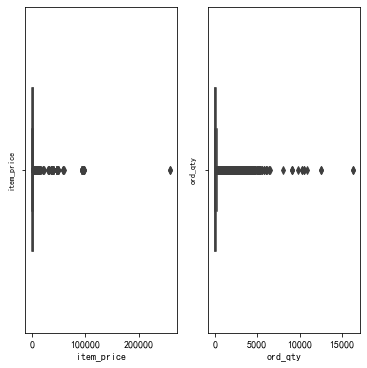

In [22]:
column=['item_price','ord_qty']
# 画箱式图
fig = plt.figure(figsize=(6, 6))  # 指定绘图对象宽度和高度
for i in range(2):
    plt.subplot(1, 2, i + 1)  # 13行3列子图
    sns.boxplot(df[column[i]], width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\数据分布.png')
plt.show()

In [14]:
#查看每种商品价格的标准差
data1=df.groupby(['item_code'])['item_price'].std()
data1

item_code
20001      6.752018
20002    362.258340
20003    127.510171
20005     72.485643
20006    134.715352
            ...    
22080     80.261889
22081    928.712376
22082    105.779561
22083    150.897969
22084    617.181894
Name: item_price, Length: 1758, dtype: float64

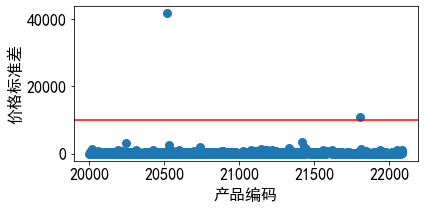

In [27]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data1.index, data1.values, lw = 3)
# 画出 y=10000 这条水平线
plt.axhline(10000,color='r')
ax.set_xlabel('产品编码', fontsize = 16)
ax.set_ylabel('价格标准差', fontsize = 16)
plt.tick_params(labelsize=16)
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\价格异常值.png')
plt.show()

In [18]:
data1[data1.values>8000]
#异常值

item_code
20517    41690.308712
21801    10837.688038
Name: item_price, dtype: float64

In [19]:
data=df[df['item_code']==20517]
data.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty
count,2.000000,2.0,2.0,2.0,2.000000,2.000000
mean,102.000000,20517.0,306.0,407.0,30527.500000,4.000000
std,1.414214,0.0,0.0,0.0,41690.308712,1.414214
min,101.000000,20517.0,306.0,407.0,1048.000000,3.000000
25%,101.500000,20517.0,306.0,407.0,15787.750000,3.500000
50%,102.000000,20517.0,306.0,407.0,30527.500000,4.000000
75%,102.500000,20517.0,306.0,407.0,45267.250000,4.500000
max,103.000000,20517.0,306.0,407.0,60007.000000,5.000000


In [7]:
#修改前
df[df['item_code']==20517]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Holiday,month,Season,sale
160924,2016-11-26,101,20517,306,407,offline,1048.0,3,3,False,11,fall,False
527717,2018-09-30,103,20517,306,407,online,1048.0,5,3,False,9,fall,False


In [4]:
#修改后
df.loc[527717,'item_price'] = 1048.0 
df[df['item_code']==20517]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Holiday,month,Season,sale
160924,2016-11-26,101,20517,306,407,offline,1048.0,3,3,False,11,fall,False
527717,2018-09-30,103,20517,306,407,online,1048.0,5,3,False,9,fall,False


In [5]:
#修改前
data=df[df['item_code']==21801]
data[data['item_price']>1500]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Holiday,month,Season,sale
527926,2018-09-30,103,21801,301,405,online,260014.0,9,3,False,9,fall,False
528706,2018-10-01,103,21801,301,405,online,260006.0,15,1,False,10,fall,False


In [6]:
data=df[df['item_code']==21801]
data[data['item_price']<1500]['item_price'].mean()##值为820.9801051709026
#修改后
df.loc[527926,'item_price'] = 820.98
df.loc[528706,'item_price'] = 820.98
# df[df['item_code']==20517]
# data=df[df['item_code']==21801]
# data.describe()

In [46]:
df[df['ord_qty']>10000]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
13522,2015-10-24,101,20323,305,412,offline,98.0,10825
17989,2015-11-12,105,21619,306,402,online,263.0,16308
18106,2015-11-12,101,21619,306,402,offline,266.0,16301
332944,2017-10-21,101,20545,305,412,offline,99.0,10278
333194,2017-10-21,101,20820,306,407,offline,744.0,12481
333850,2017-10-23,101,20545,305,412,offline,103.0,10279
334057,2017-10-23,101,20820,306,407,offline,737.0,12480
577257,2018-11-26,101,22066,307,403,offline,354.0,10543
577288,2018-11-26,101,22066,307,403,offline,593.0,10547


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


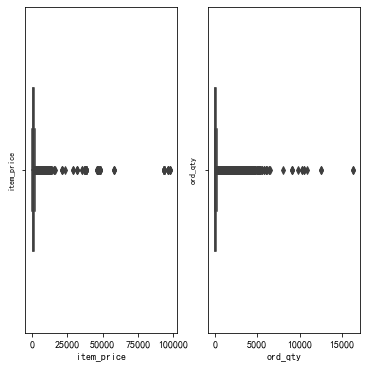

In [43]:
column=['item_price','ord_qty']
# 画箱式图
fig = plt.figure(figsize=(6, 6))  # 指定绘图对象宽度和高度
for i in range(2):
    plt.subplot(1, 2, i + 1)  # 13行3列子图
    sns.boxplot(df[column[i]], width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\数据分布修改后.png')
plt.show()

In [48]:
df.to_csv(r'E:\2023泰迪杯\B题-全部数据\处理异常值后的数据.csv')

# 2数据变量转化

## 2.1添加变量：月初、月中、月末

In [2]:
dt1 = pd.date_range(start="20150901", end="20181230", freq="D")  # freq="D"表示频率为每一
df = pd.DataFrame(index=dt1)
df=df.reset_index()
df.columns=['order_date']

In [8]:
from pandas.tseries.offsets import MonthBegin, MonthEnd 
#月初
df['MonthStart'] = df['order_date'] + MonthBegin(n=1) -  MonthBegin(n=1)

In [9]:
import datetime
df['mongap1'] = df['MonthStart']+datetime.timedelta(days=10)
df['mongap2'] = df['MonthStart']+datetime.timedelta(days=20)

In [33]:
df.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,MonthStart,mongap1,mongap2
0,2015-09-01,104,22069,307,403,offline,1114.0,19,2015-09-01,2015-09-11,2015-09-21
1,2015-09-01,104,20028,301,405,offline,1012.0,12,2015-09-01,2015-09-11,2015-09-21
2,2015-09-02,104,21183,307,403,online,428.0,109,2015-09-01,2015-09-11,2015-09-21
3,2015-09-02,104,20448,308,404,online,962.0,3,2015-09-01,2015-09-11,2015-09-21
4,2015-09-02,104,21565,307,403,offline,1400.0,3,2015-09-01,2015-09-11,2015-09-21


In [12]:
def col_cnt_(df_data, columns_list, action_list):
    if df_data[columns_list]<df_data[action_list[0]]:
        return 1
    elif df_data[columns_list]<df_data[action_list[1]]:
        return 2
    else:
        return 3
df['monperiod'] = df.apply(lambda x: col_cnt_(x, 'order_date', ['mongap1','mongap2']), axis=1)

In [14]:
del df['MonthStart']
del df['mongap1']
del df['mongap2']

In [40]:
# df['monperiod']=''
# for i in range(len(df)):
#     if df['order_date'][i]<df['mongap1'][i]:
#         df['monperiod'][i]=1
#     elif df['order_date'][i]<df['mongap2'][i]:
#         df['monperiod'][i]=2
#     else:
#         df['monperiod'][i]=3

C:\Users\asus\AppData\Local\Temp/ipykernel_24692/2105980017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monperiod'][i]=1
C:\Users\asus\AppData\Local\Temp/ipykernel_24692/2105980017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monperiod'][i]=2
C:\Users\asus\AppData\Local\Temp/ipykernel_24692/2105980017.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monperiod'][i]=3


In [43]:
del df['MonthStart']
del df['mongap1']
del df['mongap2']

In [42]:
df.to_csv(r'E:\2023泰迪杯\B题-全部数据\绘图\添加月初的数据.csv')

## 2.2添加节假日变量

In [22]:
from chinese_calendar import is_workday
from chinese_calendar import is_holiday
def is_holiday(x):
    if is_holiday(x):
        return 1
    else:
        return 0
df['Holiday']=df['order_date'].apply(is_holiday)
# for i in range(len(df_fina)):
#     if is_holiday(df_fina['order_date'][i]):
#         df_fina['Holiday'][i]=True
#     else:
#         df_fina['Holiday'][i]=False

ModuleNotFoundError: No module named 'chinese_calendar'

In [8]:
# df['Holiday']=''
# for i in range(len(df)):
#     if is_holiday(df['order_date'][i]):
#         df['Holiday'][i]=True
#     else:
#         df['Holiday'][i]=False

C:\Users\asus\AppData\Local\Temp/ipykernel_17980/1951716615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][i]=False
C:\Users\asus\AppData\Local\Temp/ipykernel_17980/1951716615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][i]=True


KeyboardInterrupt: 

In [16]:
# df['Workday']=''
# for i in range(len(df)):
#     if is_workday(df['order_date'][i]):
#         df['Workday'][i]=True
#     else:
#         df['Workday'][i]=False

C:\Users\asus\AppData\Local\Temp/ipykernel_22912/202576118.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  is_workday(df['2015'].index[0])


True

## 1.3获取日期所属季节

In [50]:
#获取季度，不是季节
# df2=df.set_index(['order_date'])
# df2['Season']=df2.index.quarter

In [6]:
#修改季节
df['month']=df['order_date'].dt.month
del df["Season"]
df["Season"] = df["month"].map({3:"spring",4:"spring",5:"spring",6:"summer",7:"summer",
                                        8:"summer",9:"fall",10:"fall",11:"fall",12:"winter",1:"winter",2:"winter"})

In [20]:
df['month']=df['order_date'].dt.month
def Season_1(x):
    if (x in [3,4,5]):
        return 1
    else:
        return 0
def Season_2(x):
    if (x in [6,7,8]):
        return 1
    else:
        return 0
def Season_3(x):
    if (x in [9,10,11]):
        return 1
    else:
        return 0
def Season_4(x):
    if (x in [12,1,2]):
        return 1
    else:
        return 0
df['Season_1']=df['month'].apply(Season_1)
df['Season_2']=df['month'].apply(Season_2)
df['Season_3']=df['month'].apply(Season_3)
df['Season_4']=df['month'].apply(Season_4)

## 1.4促销变量

In [9]:
# df1=df.reset_index()
# del df1['date']
# df1['date'] = df1['order_date'].dt.strftime('%m-%d')#将time转化为字符串

In [18]:
# dt1 = pd.date_range(start="20151101", end="20151120", freq="D")
# dt2 = pd.date_range(start="20160608", end="20160628", freq="D")
# dt3 = pd.date_range(start="20161101", end="20161120", freq="D")
# dt4 = pd.date_range(start="20170608", end="20170628", freq="D")
# dt5 = pd.date_range(start="20171101", end="20171120", freq="D")
# dt6 = pd.date_range(start="20180608", end="20180628", freq="D")
# dt7 = pd.date_range(start="20181101", end="20181120", freq="D")

In [35]:
#修改促销
del df['sale']
df['date'] = df['order_date'].dt.strftime('%m-%d')#将time转化为字符串
list_of_dates = ['06-08', '06-09', '06-10', '06-11', '06-12',
 '06-13', '06-14', '06-15', '06-16', '06-17',
 '06-18', '06-19', '06-20', '06-21', '06-22',
 '06-23', '06-24', '06-25', '06-26', '06-27', 
 '06-28', '11-01', '11-02', '11-03', '11-04', 
 '11-05', '11-06', '11-07', '11-08', '11-09',
 '11-10', '11-11', '11-12', '11-13', '11-14',
 '11-15', '11-16', '11-17', '11-18', '11-19', '11-20']
def is_sale_(x):
    return (x in list_of_dates)
df['sale']=df['date'].apply(is_sale_)
del df['date']
df.to_csv(r'E:\2023泰迪杯\B题-全部数据\修改后的数据.csv',index=False)

In [ ]:
# df['date'] = df['order_date'].dt.strftime('%m-%d')#将time转化为字符串
# list_of_dates = ['06-08', '06-09', '06-10', '06-11', '06-12',
#  '06-13', '06-14', '06-15', '06-16', '06-17',
#  '06-18', '06-19', '06-20', '06-21', '06-22',
#  '06-23', '06-24', '06-25', '06-26', '06-27', 
#  '06-28', '11-01', '11-02', '11-03', '11-04', 
#  '11-05', '11-06', '11-07', '11-08', '11-09',
#  '11-10', '11-11', '11-12', '11-13', '11-14',
#  '11-15', '11-16', '11-17', '11-18', '11-19', '11-20']
# df['sale']=''
# for i in range(len(df)):
#     if df['date'][i] in list_of_dates:
#         df['sale'][i]=1
#     else:
#         df['sale'][i]=0
# del df['date']
# df.to_csv(r'E:\2023泰迪杯\B题-全部数据\修改后的数据.csv')

In [23]:
# list_of_dates = ['06-17', '06-18', '06-19','11-10','11-11','11-12']
# df1['sale']=''
# for i in range(len(df1)):
#     if df1['date'][i] in list_of_dates:
#         df1['sale'][i]=1
#     else:
#         df1['sale'][i]=0
# del df1['date']
# df1.to_csv(r'E:\2023泰迪杯\B题-全部数据\修改后的数据.csv')

C:\Users\asus\AppData\Local\Temp/ipykernel_17376/3417195842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sale'][i]=0
C:\Users\asus\AppData\Local\Temp/ipykernel_17376/3417195842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sale'][i]=1


# 3问题一：探索不同因素对需求的影响

## 3.1价格对需求量的影响

In [17]:
# index1=df['sales_region_code'].unique().tolist()
# index2=df['item_code'].unique().tolist()
# test=pd.DataFrame(columns= ['ord_qty'],index=pd.MultiIndex.from_product([index1,index2]))
# test=test.reset_index()
# test.columns=['sales_region_code','item_code','ord_qty']
# test

,sales_region_code,item_code,ord_qty
0,104,22069,NaN
1,104,20028,NaN
2,104,21183,NaN
3,104,20448,NaN
4,104,21565,NaN
...,...,...,...
8785,103,21800,NaN
8786,103,20160,NaN
8787,103,21110,NaN
8788,103,20551,NaN


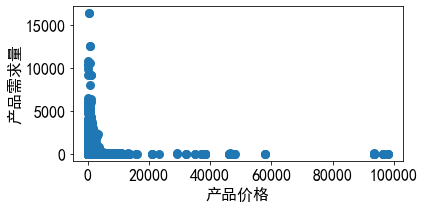

In [49]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['item_price'], df['ord_qty'], lw = 3)
ax.set_xlabel('产品价格', fontsize = 16)
ax.set_ylabel('产品需求量', fontsize = 16)
plt.tick_params(labelsize=16)
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\价格对需求量的影响.png')
plt.show()

## 3.2产品区域对需求量的影响

In [3]:
group = df.groupby(['sales_region_code'])
# df1 = group['ord_qty'].mean()
df1 = group['ord_qty'].sum()
print(df1)

sales_region_code
101    12402968
102    13970148
103    11522186
104     2387653
105    14496002
Name: ord_qty, dtype: int64


In [4]:
print(df['first_cate_code'].value_counts())
print(df['second_cate_code'].value_counts())

306    219453
302     94787
305     75170
303     71895
308     54075
307     50859
301     21459
304      9996
Name: first_cate_code, dtype: int64
407    207189
408     94787
412     75170
401     60172
404     54075
403     50859
405     21459
402     12264
409      9996
406      5187
410      5099
411      1437
Name: second_cate_code, dtype: int64


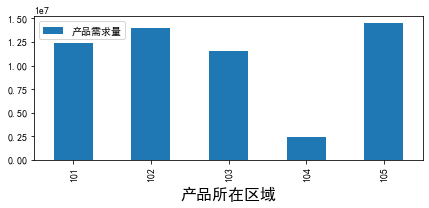

In [5]:
figure,pic=plt.subplots(1,1)
df1.plot(kind='bar',ax=pic,figsize=(6,3),label="产品需求量")
plt.tick_params(labelsize=10)
pic.set_xlabel('产品所在区域', fontsize = 16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品区域对需求量的影响.png')
plt.show()

In [6]:
region_list=list(df[ 'sales_region_code'].unique())
region_list.sort()
print(region_list)

[101, 102, 103, 104, 105]


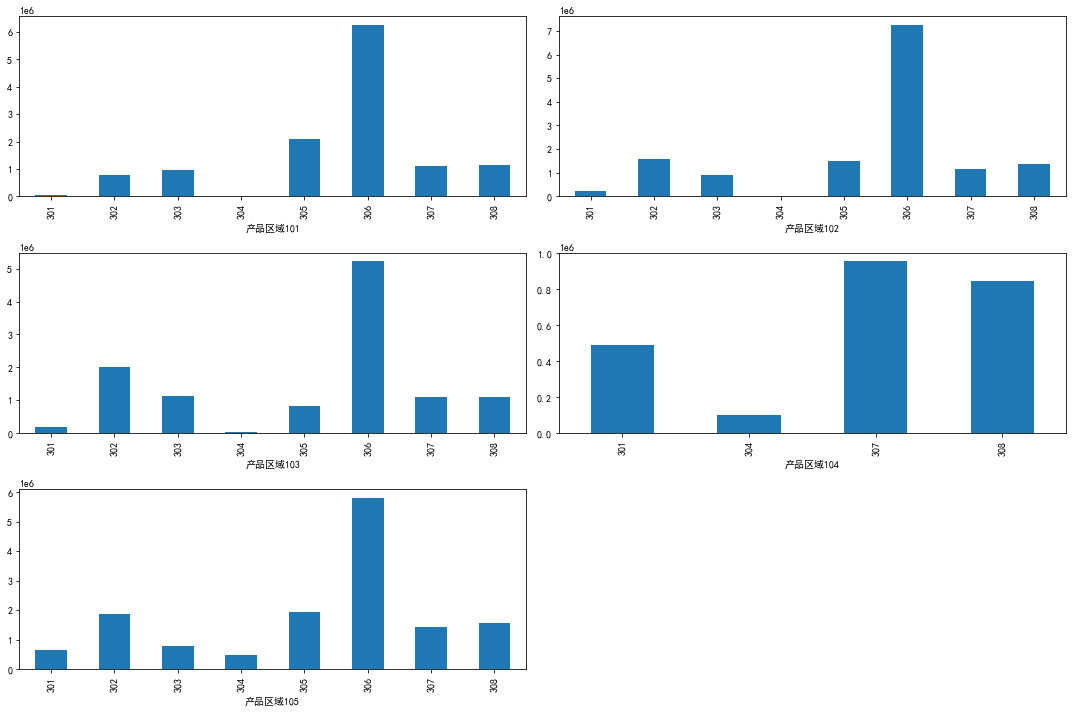

In [7]:
# 画柱状图
fig = plt.figure(figsize=(3*5, 2*5))  # 指定绘图对象宽度和高度
for i in range(5):
    plt.subplot(3, 2, i + 1)  # 13行3列子图
    data=df[df['sales_region_code']==region_list[i]].groupby(['first_cate_code']).sum()
    data['ord_qty'].plot(kind='bar',label="产品需求量")
#     plt.title('产品区域%s'%region_list[i])
    plt.xlabel('产品区域%s'%region_list[i])

plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品区域对需求量的影响2.png')
plt.show()

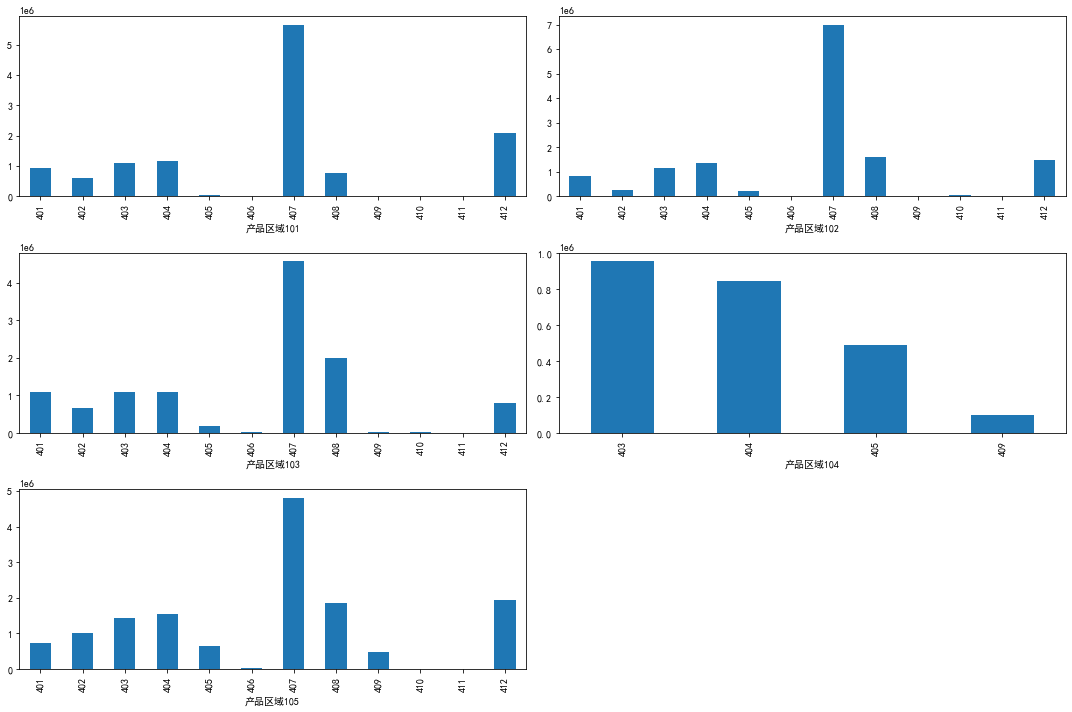

In [9]:
# 画柱状图
fig = plt.figure(figsize=(3*5, 2*5))  # 指定绘图对象宽度和高度
for i in range(5):
    plt.subplot(3, 2, i + 1)  # 13行3列子图
    data=df[df['sales_region_code']==region_list[i]].groupby(['second_cate_code']).sum()
    data['ord_qty'].plot(kind='bar',label="产品需求量")
#     plt.title('产品区域%s'%region_list[i])
    plt.xlabel('产品区域%s'%region_list[i])

plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品区域对需求量的影响3.png')
plt.show()

## 3.3不同销售方式（线上和线下）的产品需求量的特性

In [41]:
print(df['sales_chan_name'].value_counts())

offline    439465
online     158229
Name: sales_chan_name, dtype: int64


In [10]:
data=df.groupby(['sales_chan_name'])['ord_qty'].sum()

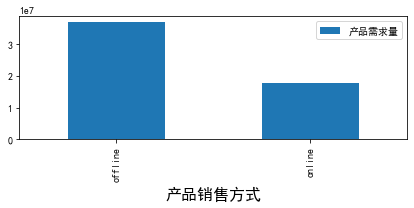

In [11]:
figure,pic=plt.subplots(1,1)
data.plot(kind='bar',ax=pic,figsize=(6,3),label="产品需求量")
plt.tick_params(labelsize=10)
pic.set_xlabel('产品销售方式', fontsize = 16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品销售方式对需求量的影响.png')
plt.show()

In [12]:
data=df.groupby(by=['sales_region_code', 'sales_chan_name'])['ord_qty'].sum()
data=data.reset_index()
data

,sales_region_code,sales_chan_name,ord_qty
0,101,offline,11542949
1,101,online,860019
2,102,offline,13634154
3,102,online,335994
4,103,offline,10173394
5,103,online,1348792
6,104,offline,131335
7,104,online,2256318
8,105,offline,1492361
9,105,online,13003641


In [13]:
df1=data[data['sales_chan_name']=='offline']
df2=data[data['sales_chan_name']=='online']
df3 = pd.merge(df1,df2,on='sales_region_code',how='inner')
df3

,sales_region_code,sales_chan_name_x,ord_qty_x,sales_chan_name_y,ord_qty_y
0,101,offline,11542949,online,860019
1,102,offline,13634154,online,335994
2,103,offline,10173394,online,1348792
3,104,offline,131335,online,2256318
4,105,offline,1492361,online,13003641


In [14]:
del df3['sales_chan_name_x']
del df3['sales_chan_name_y']
df3=df3.set_index('sales_region_code')
df3.columns=['offline','online']
df3

,offline,online
sales_region_code,,
101,11542949,860019
102,13634154,335994
103,10173394,1348792
104,131335,2256318
105,1492361,13003641


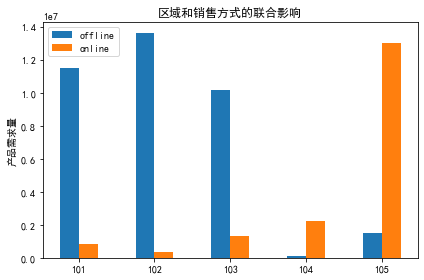

In [15]:
x = np.arange(len(df3))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, df3['offline'], width, label='offline')
rects2 = ax.bar(x + width/2, df3['online'], width, label='online')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('产品需求量')
ax.set_title('区域和销售方式的联合影响')
ax.set_xticks(x)
ax.set_xticklabels(df3.index)
ax.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品区域和销售方式对需求量的影响.png')
plt.show()

In [16]:
data=df.groupby(by=['second_cate_code', 'sales_chan_name'])['ord_qty'].sum()
data=data.reset_index()
data

,second_cate_code,sales_chan_name,ord_qty
0,401,offline,2692791
1,401,online,914032
2,402,offline,1357884
3,402,online,1172973
4,403,offline,3389800
5,403,online,2339815
6,404,offline,3773470
7,404,online,2221953
8,405,offline,445434
9,405,online,1141300


In [17]:
df1=data[data['sales_chan_name']=='offline']
df2=data[data['sales_chan_name']=='online']
df3 = pd.merge(df1,df2,on='second_cate_code',how='inner')
df3

,second_cate_code,sales_chan_name_x,ord_qty_x,sales_chan_name_y,ord_qty_y
0,401,offline,2692791,online,914032
1,402,offline,1357884,online,1172973
2,403,offline,3389800,online,2339815
3,404,offline,3773470,online,2221953
4,405,offline,445434,online,1141300
5,406,offline,47029,online,17
6,407,offline,16592757,online,5428266
7,408,offline,3988155,online,2234364
8,409,offline,546329,online,72217
9,410,offline,81558,online,134


In [18]:
del df3['sales_chan_name_x']
del df3['sales_chan_name_y']
df3=df3.set_index('second_cate_code')
df3.columns=['offline','online']
df3

,offline,online
second_cate_code,,
401,2692791,914032
402,1357884,1172973
403,3389800,2339815
404,3773470,2221953
405,445434,1141300
406,47029,17
407,16592757,5428266
408,3988155,2234364
409,546329,72217


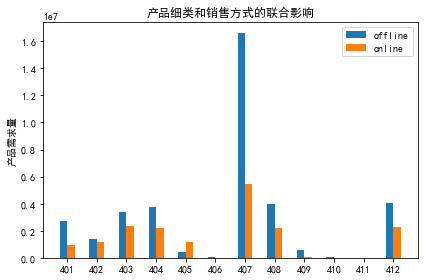

In [19]:
x = np.arange(len(df3))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, df3['offline'], width, label='offline')
rects2 = ax.bar(x + width/2, df3['online'], width, label='online')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('产品需求量')
ax.set_title('产品细类和销售方式的联合影响')
ax.set_xticks(x)
ax.set_xticklabels(df3.index)
ax.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品细类和销售方式对需求量的影响.png')
plt.show()

## 3.4不同品类之间的产品需求量有何不同点和共同点

In [3]:
data=df.groupby(['first_cate_code'])['ord_qty'].sum()

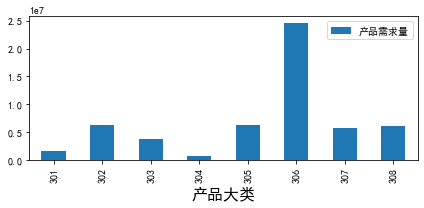

In [23]:
figure,pic=plt.subplots(1,1)
data.plot(kind='bar',ax=pic,figsize=(6,3),label="产品需求量")
plt.tick_params(labelsize=10)
pic.set_xlabel('产品大类', fontsize = 16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\产品大类对需求量的影响.png')
plt.show()

In [4]:
data=df.groupby(by=['order_date', 'first_cate_code'])['ord_qty'].sum()
data=data.reset_index()
data

,order_date,first_cate_code,ord_qty
0,2015-09-01,301,12
1,2015-09-01,307,19
2,2015-09-02,301,11
3,2015-09-02,303,18
4,2015-09-02,305,917
...,...,...,...
9095,2018-12-20,304,1617
9096,2018-12-20,305,6200
9097,2018-12-20,306,33120
9098,2018-12-20,307,7774


In [5]:
data2=data.set_index(['order_date','first_cate_code'])
data2

ord_qty
order_date first_cate_code         
2015-09-01 301                   12
           307                   19
2015-09-02 301                   11
           303                   18
           305                  917
...                             ...
2018-12-20 304                 1617
           305                 6200
           306                33120
           307                 7774
           308                 7008

[9100 rows x 1 columns]

In [6]:
data2=data.set_index(['order_date','first_cate_code'])
data3=data2.unstack()
data3

ord_qty                                                     \
first_cate_code     301      302     303     304     305      306      307   
order_date                                                                   
2015-09-01         12.0      NaN     NaN     NaN     NaN      NaN     19.0   
2015-09-02         11.0      NaN    18.0     NaN   917.0      NaN    112.0   
2015-09-03          NaN    724.0   408.0     NaN   451.0    458.0      NaN   
2015-09-04          NaN   2283.0   113.0     NaN   946.0  10164.0      NaN   
2015-09-05        486.0   2546.0  2471.0     NaN  1485.0  17670.0   1280.0   
...                 ...      ...     ...     ...     ...      ...      ...   
2018-12-16       1446.0   4640.0  2402.0   641.0  1220.0  14646.0   5003.0   
2018-12-17       1632.0   3812.0  1642.0   368.0   654.0   9280.0   4884.0   
2018-12-18        494.0   3024.0  3012.0   632.0  3870.0  16519.0  11061.0   
2018-12-19        479.0   3870.0  3015.0  1296.0  3567.0  22629.0   8929.0   
2018-12-20        481.0  10761.0  2086.0  1617.0  6200.0  33120.0   7774.0   

                          
first_cate_code      308  
order_date                
2015-09-01           NaN  
2015-09-02          34.0  
2015-09-03           NaN  
2015-09-04           NaN  
2015-09-05        1106.0  
...                  ...  
2018-12-16        5950.0  
2018-12-17        3745.0  
2018-12-18       10095.0  
2018-12-19        5992.0  
2018-12-20        7008.0  

[1172 rows x 8 columns]

In [7]:
#一共有1172行，说明有些天数没有需求量
data2=data.set_index(['order_date','first_cate_code'])
data3=data2.unstack()
data3.columns=['301', '302', '303', '304', '305', '306', '307', '308']
data3

,301,302,303,304,305,306,307,308
order_date,,,,,,,,
2015-09-01,12.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN
2015-09-02,11.0,NaN,18.0,NaN,917.0,NaN,112.0,34.0
2015-09-03,NaN,724.0,408.0,NaN,451.0,458.0,NaN,NaN
2015-09-04,NaN,2283.0,113.0,NaN,946.0,10164.0,NaN,NaN
2015-09-05,486.0,2546.0,2471.0,NaN,1485.0,17670.0,1280.0,1106.0
...,...,...,...,...,...,...,...,...
2018-12-16,1446.0,4640.0,2402.0,641.0,1220.0,14646.0,5003.0,5950.0
2018-12-17,1632.0,3812.0,1642.0,368.0,654.0,9280.0,4884.0,3745.0
2018-12-18,494.0,3024.0,3012.0,632.0,3870.0,16519.0,11061.0,10095.0


In [4]:
class_list=list(df[ 'first_cate_code'].unique())
class_list.sort()
print(class_list)

[301, 302, 303, 304, 305, 306, 307, 308]


In [8]:
dt1 = pd.date_range(start="20150901", end="20181220", freq="D")  # freq="D"表示频率为每一
df1 = pd.DataFrame(index=dt1, columns=['多余'])

In [15]:
df1

,多余
2015-09-01,NaN
2015-09-02,NaN
2015-09-03,NaN
2015-09-04,NaN
2015-09-05,NaN
...,...
2018-12-16,NaN
2018-12-17,NaN
2018-12-18,NaN
2018-12-19,NaN


In [9]:
df_final = df1.merge(data3, how='left', left_index=True, right_index=True)
del df_final['多余']
df_fina=df_final.sort_index()
df_fina=df_fina.fillna(value=0)
df_fina

,301,302,303,304,305,306,307,308
2015-09-01,12.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
2015-09-02,11.0,0.0,18.0,0.0,917.0,0.0,112.0,34.0
2015-09-03,0.0,724.0,408.0,0.0,451.0,458.0,0.0,0.0
2015-09-04,0.0,2283.0,113.0,0.0,946.0,10164.0,0.0,0.0
2015-09-05,486.0,2546.0,2471.0,0.0,1485.0,17670.0,1280.0,1106.0
...,...,...,...,...,...,...,...,...
2018-12-16,1446.0,4640.0,2402.0,641.0,1220.0,14646.0,5003.0,5950.0
2018-12-17,1632.0,3812.0,1642.0,368.0,654.0,9280.0,4884.0,3745.0
2018-12-18,494.0,3024.0,3012.0,632.0,3870.0,16519.0,11061.0,10095.0
2018-12-19,479.0,3870.0,3015.0,1296.0,3567.0,22629.0,8929.0,5992.0


In [11]:
#补全天数后的不同品类的商品需求量整理
df_fina.to_csv(r'E:\2023泰迪杯\B题-全部数据\绘图\按照产品大类整理的需求量.csv')

In [23]:
#没有销量的日期
# df_fina.columns=['301', '302', '303', '304', '305', '306', '307', '308','多余']
df_fina['多余']=df_fina.sum(axis=1)
df_null=df_fina[df_fina['多余']==0]
df_null.to_csv(r'E:\2023泰迪杯\B题-全部数据\绘图\没有订单的日子.csv')  #十一、元旦、春节

In [24]:
df_fina.corr()

,301,302,303,304,305,306,307,308
301,1.000000,0.346162,0.271631,0.321204,0.244580,0.287685,0.611300,0.633320
302,0.346162,1.000000,0.490888,0.248739,0.479735,0.686709,0.367876,0.407779
303,0.271631,0.490888,1.000000,0.194337,0.538899,0.526588,0.273841,0.316968
304,0.321204,0.248739,0.194337,1.000000,0.069692,0.150976,0.450283,0.439376
305,0.244580,0.479735,0.538899,0.069692,1.000000,0.489659,0.127567,0.131986
306,0.287685,0.686709,0.526588,0.150976,0.489659,1.000000,0.303237,0.326147
307,0.611300,0.367876,0.273841,0.450283,0.127567,0.303237,1.000000,0.840438
308,0.633320,0.407779,0.316968,0.439376,0.131986,0.326147,0.840438,1.000000


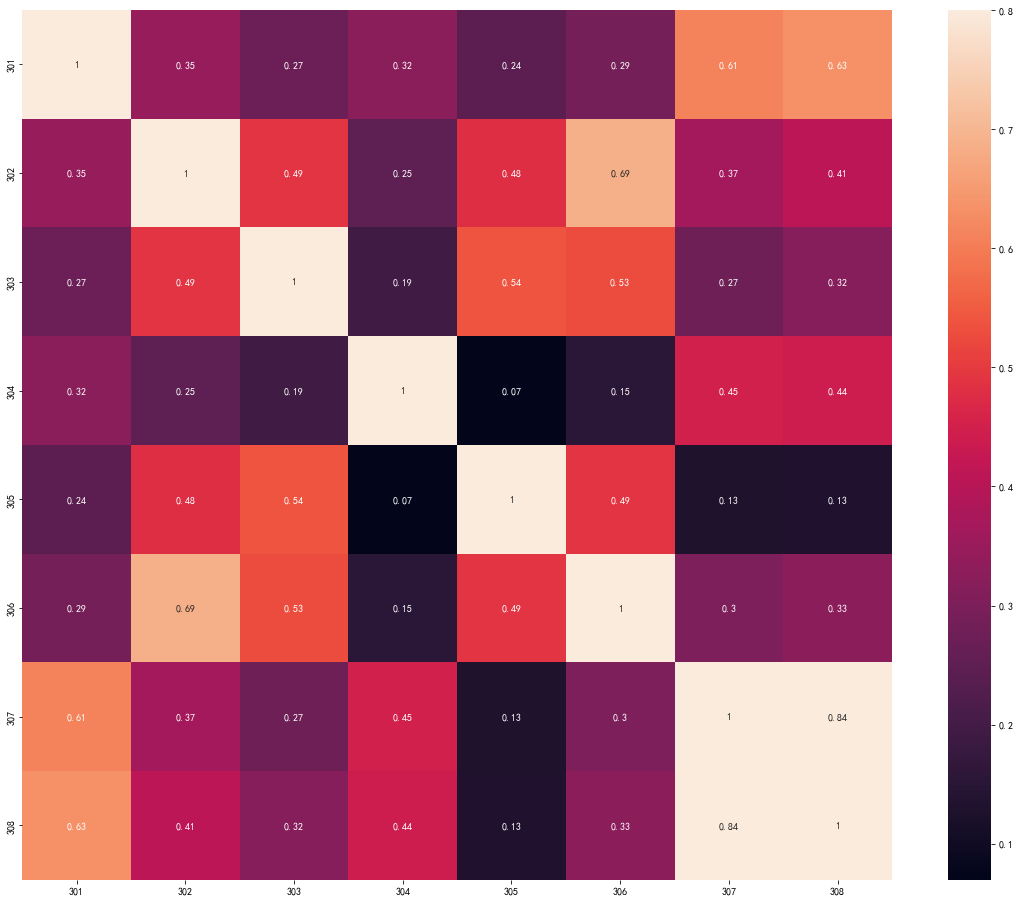

In [29]:
# 画出相关性热力图
ax = plt.subplots(figsize=(20, 16))#调整画布大小
ax = sns.heatmap(df_fina.corr(), vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\类别热力图.png')
plt.show()

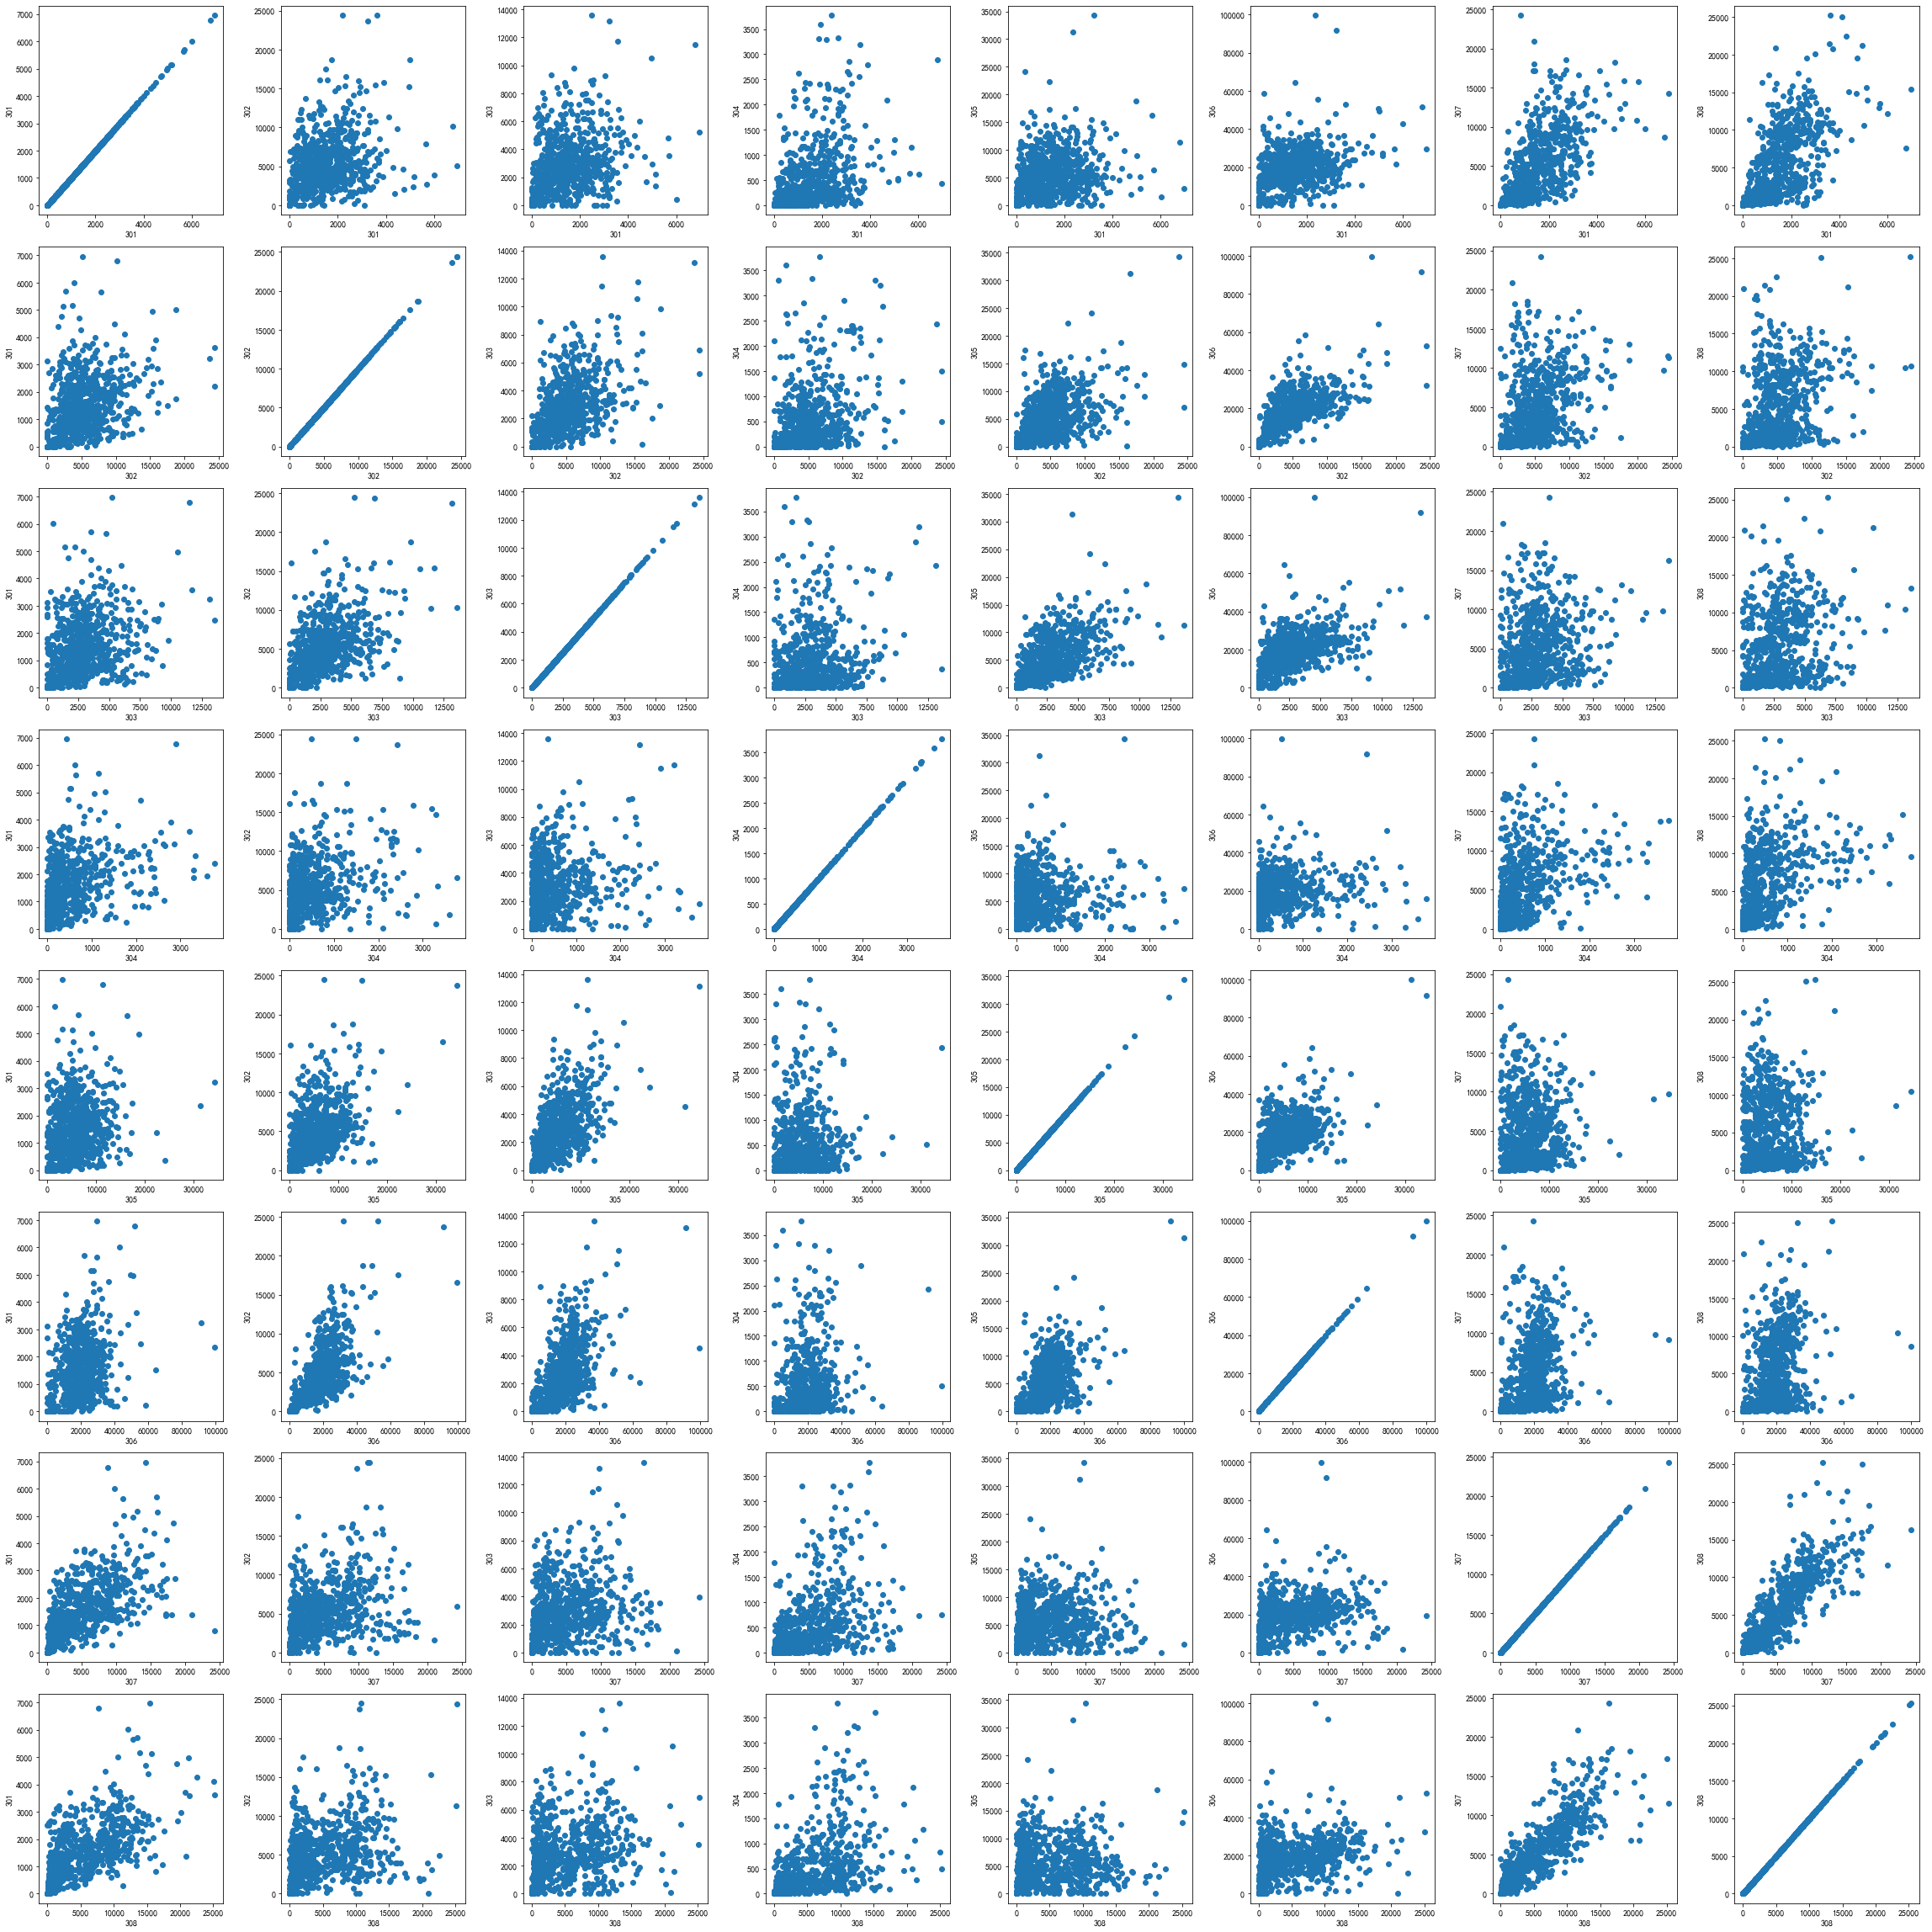

In [23]:
train_cols = len(data.columns)
train_rows = len(data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))
classlist=['301', '302', '303', '304', '305', '306', '307', '308']
i=0
for col_row in data.columns:
    for col_column in data.columns:
        i+=1
        ax=plt.subplot(train_rows,train_cols,i)
        ax.scatter(data[col_row], data[col_column])
        plt.xlabel(col_row)
        plt.ylabel(col_column)
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\类别对比.png')
plt.show()

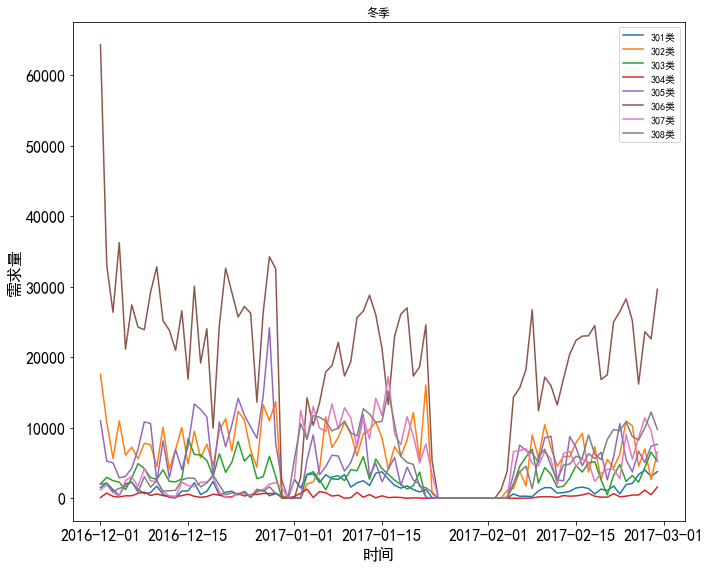

In [59]:
data=df_fina['2016-12':'2017-02']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data['301'],ls='solid', label='301类')
ax.plot(data['302'],ls='solid', label='302类')
ax.plot(data['303'],ls='solid', label='303类')
ax.plot(data['304'],ls='solid', label='304类')
ax.plot(data['305'],ls='solid', label='305类')
ax.plot(data['306'],ls='solid', label='306类')
ax.plot(data['307'],ls='solid', label='307类')
ax.plot(data['308'],ls='solid', label='308类')
ax.set_xlabel('时间', fontsize = 16)
ax.set_ylabel('需求量', fontsize = 16)
plt.title('冬季')
plt.tick_params(labelsize=16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\冬季类别vs需求.png')
plt.show()

## 3.5不同时间段（例如月头、月中、月末等）产品需求量有何特性

In [7]:
data=df['2016']
data['月份']=data.index.month
data.head()

,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Holiday,Season,sale,月份
order_date,,,,,,,,,,,,
2016-01-02,102,20037,302,408,offline,2202.0,11,1,False,1,0,1
2016-01-02,104,21061,308,404,online,644.0,17,1,False,1,0,1
2016-01-02,103,20230,306,407,offline,861.0,156,1,False,1,0,1
2016-01-02,102,22022,302,408,offline,1507.0,8,1,False,1,0,1
2016-01-02,103,20964,306,407,offline,1314.0,51,1,False,1,0,1


In [10]:
data1=data.groupby(by=['月份', 'monperiod'])['ord_qty'].sum()
data1

月份  monperiod
1   1            493276
    2            612976
    3            538152
2   1             51078
    2            113685
    3            328915
3   1            316126
    2            379967
    3            508015
4   1            281235
    2            329661
    3            356865
5   1            282028
    2            436568
    3            500219
6   1            252484
    2            325265
    3            369778
7   1            107100
    2            267406
    3            296375
8   1            230586
    2            416975
    3            439781
9   1            292710
    2            394607
    3            345805
10  1            498640
    2            611971
    3            630325
11  1            403776
    2            365408
    3            350271
12  1            550902
    2            471113
    3            522199
Name: ord_qty, dtype: int64

In [13]:
data2=data1.unstack()
data2.columns=['月初','月中','月末']
data2

,月初,月中,月末
月份,,,
1,493276,612976,538152
2,51078,113685,328915
3,316126,379967,508015
4,281235,329661,356865
5,282028,436568,500219
6,252484,325265,369778
7,107100,267406,296375
8,230586,416975,439781
9,292710,394607,345805


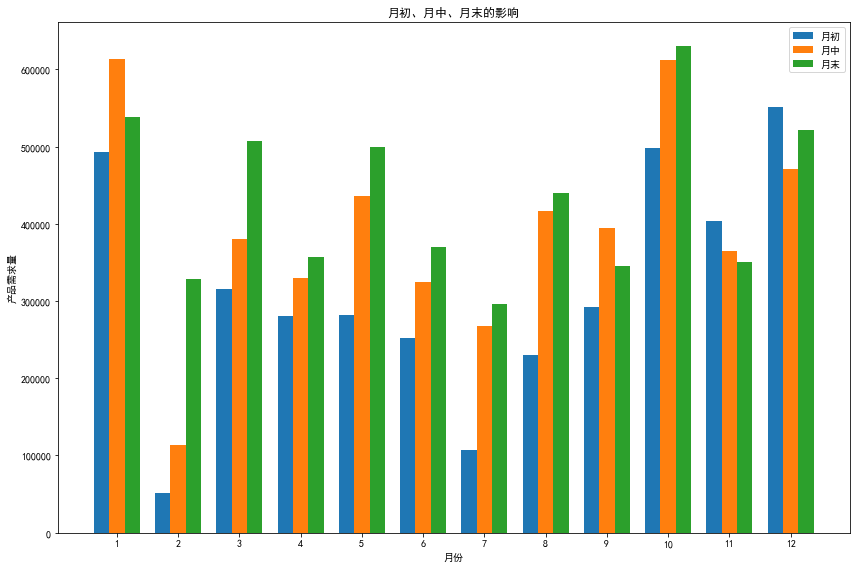

In [21]:
x = np.arange(len(data2))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - 1*width, data2['月初'], width, label='月初')
rects2 = ax.bar(x, data2['月中'], width, label='月中')
rects3 = ax.bar(x + 1*width, data2['月末'], width, label='月末')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('产品需求量')
ax.set_xlabel('月份')
ax.set_title('月初、月中、月末的影响')
ax.set_xticks(x)
ax.set_xticklabels(data2.index)
ax.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\月初对需求量的影响.png')
plt.show()

## 3.6节假日对产品需求量的影响

In [6]:
data=df['2016']
del data['Holiday']

C:\Users\asus\AppData\Local\Temp/ipykernel_24560/1939518024.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data=df['2016']


In [10]:
dt1 = pd.date_range(start="20160101", end="20161231", freq="D")  # freq="D"表示频率为每一
df1 = pd.DataFrame(index=dt1, columns=['多余'])

In [11]:
df_final = df1.merge(data, how='left', left_index=True, right_index=True)
del df_final['多余']
df_fina=df_final.sort_index()
df_fina=df_fina.fillna(value=0)
df_fina

,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Season,sale
2016-01-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2016-01-02,102.0,20037.0,302.0,408.0,offline,2202.0,11.0,1.0,1.0,0.0
2016-01-02,104.0,21061.0,308.0,404.0,online,644.0,17.0,1.0,1.0,0.0
2016-01-02,103.0,20230.0,306.0,407.0,offline,861.0,156.0,1.0,1.0,0.0
2016-01-02,102.0,22022.0,302.0,408.0,offline,1507.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,104.0,21551.0,308.0,404.0,online,1427.0,8.0,3.0,4.0,0.0
2016-12-31,104.0,21179.0,308.0,404.0,online,1226.0,7.0,3.0,4.0,0.0
2016-12-31,104.0,20340.0,308.0,404.0,online,1227.0,5.0,3.0,4.0,0.0
2016-12-31,104.0,21446.0,308.0,404.0,online,1531.0,67.0,3.0,4.0,0.0


In [17]:
df_fina=df_fina.reset_index()
df_fina.rename(columns={'index': 'order_date'}, inplace=True)
df_fina

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Season,sale
0,2016-01-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,102.0,20037.0,302.0,408.0,offline,2202.0,11.0,1.0,1.0,0.0
2,2016-01-02,104.0,21061.0,308.0,404.0,online,644.0,17.0,1.0,1.0,0.0
3,2016-01-02,103.0,20230.0,306.0,407.0,offline,861.0,156.0,1.0,1.0,0.0
4,2016-01-02,102.0,22022.0,302.0,408.0,offline,1507.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142901,2016-12-31,104.0,21551.0,308.0,404.0,online,1427.0,8.0,3.0,4.0,0.0
142902,2016-12-31,104.0,21179.0,308.0,404.0,online,1226.0,7.0,3.0,4.0,0.0
142903,2016-12-31,104.0,20340.0,308.0,404.0,online,1227.0,5.0,3.0,4.0,0.0
142904,2016-12-31,104.0,21446.0,308.0,404.0,online,1531.0,67.0,3.0,4.0,0.0


In [24]:
df.to_excel(r'E:\2023泰迪杯\B题-全部数据\quanbutianshu.xlsx',index=False)

In [26]:
# df_fina.rename(columns={'Holiday': 'Workday','Workday':'Holiday'}, inplace=True)
# df_fina

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Season,sale,Workday,Holiday
0,2016-01-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,False,True
1,2016-01-02,102.0,20037.0,302.0,408.0,offline,2202.0,11.0,1.0,1.0,0.0,False,True
2,2016-01-02,104.0,21061.0,308.0,404.0,online,644.0,17.0,1.0,1.0,0.0,False,True
3,2016-01-02,103.0,20230.0,306.0,407.0,offline,861.0,156.0,1.0,1.0,0.0,False,True
4,2016-01-02,102.0,22022.0,302.0,408.0,offline,1507.0,8.0,1.0,1.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142901,2016-12-31,104.0,21551.0,308.0,404.0,online,1427.0,8.0,3.0,4.0,0.0,False,True
142902,2016-12-31,104.0,21179.0,308.0,404.0,online,1226.0,7.0,3.0,4.0,0.0,False,True
142903,2016-12-31,104.0,20340.0,308.0,404.0,online,1227.0,5.0,3.0,4.0,0.0,False,True
142904,2016-12-31,104.0,21446.0,308.0,404.0,online,1531.0,67.0,3.0,4.0,0.0,False,True


In [29]:
df_fina

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Season,sale,Workday,Holiday
0,2016-01-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,False,True
1,2016-01-02,102.0,20037.0,302.0,408.0,offline,2202.0,11.0,1.0,1.0,0.0,False,True
2,2016-01-02,104.0,21061.0,308.0,404.0,online,644.0,17.0,1.0,1.0,0.0,False,True
3,2016-01-02,103.0,20230.0,306.0,407.0,offline,861.0,156.0,1.0,1.0,0.0,False,True
4,2016-01-02,102.0,22022.0,302.0,408.0,offline,1507.0,8.0,1.0,1.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142901,2016-12-31,104.0,21551.0,308.0,404.0,online,1427.0,8.0,3.0,4.0,0.0,False,True
142902,2016-12-31,104.0,21179.0,308.0,404.0,online,1226.0,7.0,3.0,4.0,0.0,False,True
142903,2016-12-31,104.0,20340.0,308.0,404.0,online,1227.0,5.0,3.0,4.0,0.0,False,True
142904,2016-12-31,104.0,21446.0,308.0,404.0,online,1531.0,67.0,3.0,4.0,0.0,False,True


In [28]:
df_fina.to_csv(r'E:\2023泰迪杯\B题-全部数据\2016年节假日数据.csv',index=False)

In [30]:
# data1=data[data['Holiday']==False]
data2=df_fina[df_fina['Holiday']==True]

In [38]:
df_fina['week'] = df_fina['order_date'].apply(lambda x: x.weekday() + 1)

In [40]:

#判断函数
def weekend_judge(x):
    if x < 6:
        return 0
    else:
        return 1
 
 
df_fina['week'] = df_fina['week'].apply(func=weekend_judge)

In [42]:
df_fina.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Season,sale,Workday,Holiday,week
0,2016-01-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,False,True,0
1,2016-01-02,102.0,20037.0,302.0,408.0,offline,2202.0,11.0,1.0,1.0,0.0,False,True,1
2,2016-01-02,104.0,21061.0,308.0,404.0,online,644.0,17.0,1.0,1.0,0.0,False,True,1
3,2016-01-02,103.0,20230.0,306.0,407.0,offline,861.0,156.0,1.0,1.0,0.0,False,True,1
4,2016-01-02,102.0,22022.0,302.0,408.0,offline,1507.0,8.0,1.0,1.0,0.0,False,True,1


In [43]:
data5=df_fina[df_fina['week']==1]
data6=data5.groupby(by='order_date')['ord_qty'].sum()

In [31]:
data3=df_fina.groupby(by='order_date')['ord_qty'].sum()
data4=data2.groupby(by='order_date')['ord_qty'].sum()
# data3

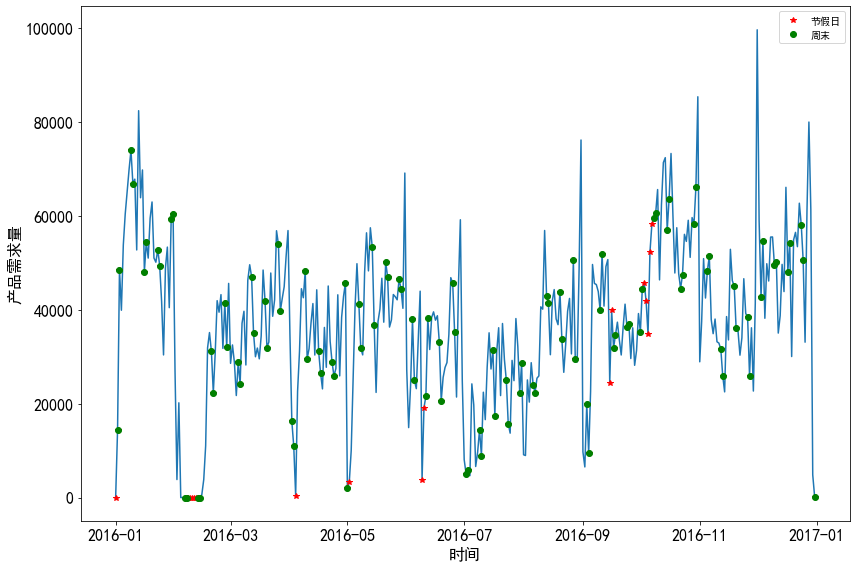

In [44]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data3,ls='solid')
ax.plot(data4,marker='*',linestyle='',color='r',label='节假日')
ax.plot(data6,marker='o',linestyle='',color='g',label='周末')
# ax.scatter(data3.index, df['ord_qty'], lw = 3)
ax.set_xlabel('时间', fontsize = 16)
ax.set_ylabel('产品需求量', fontsize = 16)
plt.tick_params(labelsize=16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\节假日对需求量的影响11.png')
plt.show()

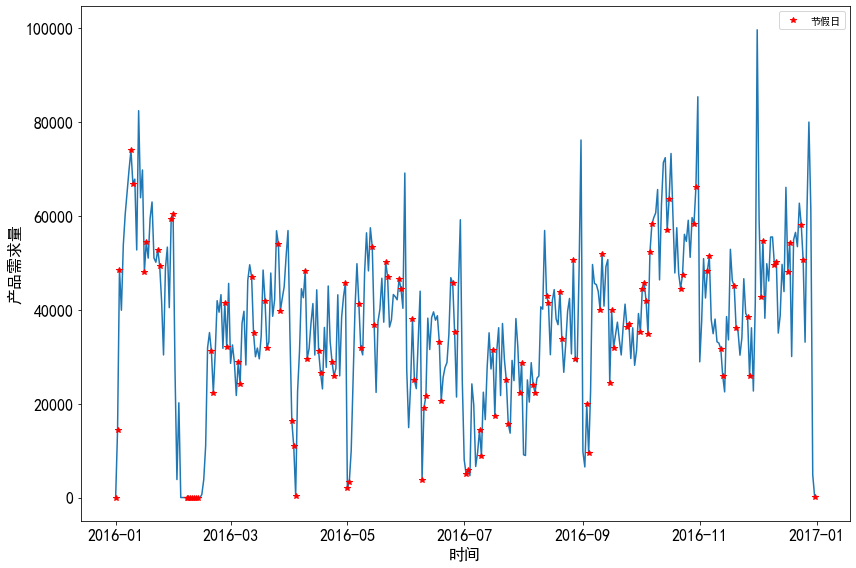

In [36]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data3,ls='solid')
ax.plot(data4,marker='*',linestyle='',color='r',label='节假日')
# ax.plot(data6,marker='o',linestyle='',color='g',label='周末')
# ax.scatter(data3.index, df['ord_qty'], lw = 3)
ax.set_xlabel('时间', fontsize = 16)
ax.set_ylabel('产品需求量', fontsize = 16)
plt.tick_params(labelsize=16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\节假日对需求量的影响11.png')
plt.show()

## 3.7促销（如618、双十一等）对产品需求量的影响

In [3]:
data=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\2016年节假日数据.csv',parse_dates=["order_date"])
data=data.set_index('order_date')

In [10]:
data.head()

,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Season,sale,Workday,Holiday
order_date,,,,,,,,,,,,
2016-01-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,False,True
2016-01-02,102.0,20037.0,302.0,408.0,offline,2202.0,11.0,1.0,1.0,0.0,False,True
2016-01-02,104.0,21061.0,308.0,404.0,online,644.0,17.0,1.0,1.0,0.0,False,True
2016-01-02,103.0,20230.0,306.0,407.0,offline,861.0,156.0,1.0,1.0,0.0,False,True
2016-01-02,102.0,22022.0,302.0,408.0,offline,1507.0,8.0,1.0,1.0,0.0,False,True


In [14]:
data1=data['2016-05':'2016-07']
data2=data['2016-10':'2016-12']

In [15]:
data3=data1.groupby(by='order_date')['ord_qty'].sum()
data4=data2.groupby(by='order_date')['ord_qty'].sum()

In [26]:
time = pd.to_datetime('2016-06-18', format='%Y-%m-%d')
data3_1=data3[data3.index==time]

In [33]:
time1 = pd.to_datetime('2016-11-11', format='%Y-%m-%d')
data4_1=data4[data4.index==time1]

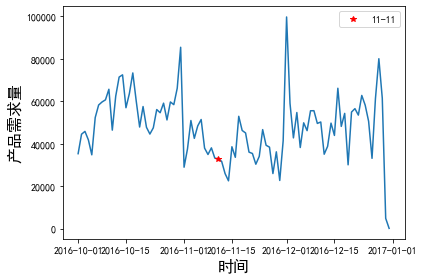

In [34]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data4,ls='solid')
ax.plot(data4_1,marker='*',linestyle='',color='r',label='11-11')
ax.set_xlabel('时间', fontsize = 16)
ax.set_ylabel('产品需求量', fontsize = 16)

# ax = fig.add_subplot(1, 2, 2)
# ax.plot(data4,ls='solid')
# ax.set_xlabel('时间', fontsize = 16)
# ax.set_ylabel('产品需求量', fontsize = 16)
# plt.tick_params(labelsize=16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\促销对需求量的影响1.png')
plt.show()

In [37]:
# data1=data['2016-06'].groupby(by='order_date')['ord_qty'].sum()
# data2=data['2016-11'].groupby(by='order_date')['ord_qty'].sum()
# data1.to_csv(r'E:\2023泰迪杯\B题-全部数据\绘图\618.csv')
# data2.to_csv(r'E:\2023泰迪杯\B题-全部数据\绘图\1111.csv')

C:\Users\asus\AppData\Local\Temp/ipykernel_21484/1761088504.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data1=data['2016-06'].groupby(by='order_date')['ord_qty'].sum()
C:\Users\asus\AppData\Local\Temp/ipykernel_21484/1761088504.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data2=data['2016-11'].groupby(by='order_date')['ord_qty'].sum()


## 3.8季节因素对产品需求量的影响

In [8]:
# df=df.set_index('order_date')
data1=df['2016-03':'2017-02']
data2=df['2017-03':'2018-02']

In [12]:
data1=data1.groupby(by=['Season'])['ord_qty'].sum()
data2=data2.groupby(by=['Season'])['ord_qty'].sum()

In [15]:
data1

Season
fall      3893513
spring    3390684
summer    2705750
winter    3989526
Name: ord_qty, dtype: int64

In [4]:
# data=df[df['order_date'].dt.year.isin([2016,2017])]  #当日期不是索引列的时候
# data=data.sort_index()
data['年份']=data['order_date'].dt.year
data=data.set_index('order_date')

NameError: name 'data' is not defined

In [17]:
data.head()

,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,monperiod,Holiday,Season,sale,年份
order_date,,,,,,,,,,,,
2016-01-02,102,20037,302,408,offline,2202.0,11,1,False,1,0,2016
2016-01-02,104,21061,308,404,online,644.0,17,1,False,1,0,2016
2016-01-02,103,20230,306,407,offline,861.0,156,1,False,1,0,2016
2016-01-02,102,22022,302,408,offline,1507.0,8,1,False,1,0,2016
2016-01-02,103,20964,306,407,offline,1314.0,51,1,False,1,0,2016


In [22]:
df

,春,夏,秋,冬
年份,,,,
2016,3390684,2705750,3893513,3989526
2017,5155193,3879775,6328379,4910325


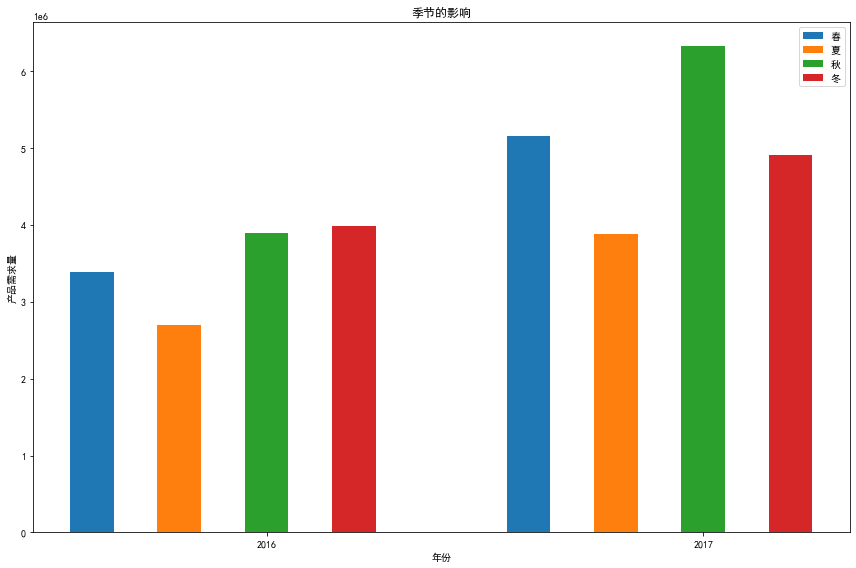

In [27]:
x = np.arange(2)  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - 2*width, df['春'], width*0.5, label='春')
rects2 = ax.bar(x-1*width, df['夏'], width*0.5, label='夏')
rects3 = ax.bar(x, df['秋'], width*0.5, label='秋')
rects4 = ax.bar(x + 1*width, df['冬'], width*0.5, label='冬')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('产品需求量')
ax.set_xlabel('年份')
ax.set_title('季节的影响')
ax.set_xticks(x)
ax.set_xticklabels(df.index)
ax.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\季节需求量的影响.png')
plt.show()

In [20]:
# data1=data.groupby(by=['年份','Season'])['ord_qty'].sum()

In [23]:
# data2=data1.unstack()
# data2.columns=['第一季度','第二季度','第三季度','第四季度']
# data2

,第一季度,第二季度,第三季度,第四季度
年份,,,,
2016,3342190,3134103,2791345,4404605
2017,4353418,4554570,4568376,6006351


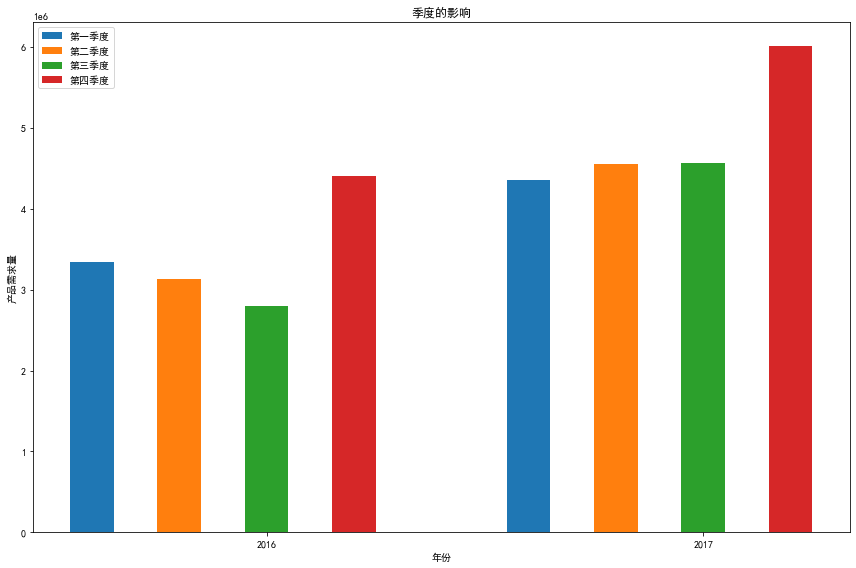

In [29]:
# x = np.arange(len(data2))  # the label locations
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(12,8))
# rects1 = ax.bar(x - 2*width, data2['第一季度'], width*0.5, label='第一季度')
# rects2 = ax.bar(x-1*width, data2['第二季度'], width*0.5, label='第二季度')
# rects3 = ax.bar(x, data2['第三季度'], width*0.5, label='第三季度')
# rects4 = ax.bar(x + 1*width, data2['第四季度'], width*0.5, label='第四季度')
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('产品需求量')
# ax.set_xlabel('年份')
# ax.set_title('季度的影响')
# ax.set_xticks(x)
# ax.set_xticklabels(data2.index)
# ax.legend()
# plt.tight_layout() 
# plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\季度需求量的影响.png')
# plt.show()

# 4建立lstm模型--按月进行预测

## 4.1 处理数据-选出需要预测的数据

In [2]:
data=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\predict_sku1.csv')
data.head()

,sales_region_code,item_code,first_cate_code,second_cate_code
0,101,20002,303,406
1,101,20003,301,405
2,101,20006,307,403
3,101,20011,303,401
4,101,20014,307,403


In [3]:
data1=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\销量不为零的商品.csv',index_col=0)
list1=data1.index.tolist()
data=data.loc[data['item_code'].isin(list1)]

In [7]:
data1=data[data['sales_region_code']==101]
data2=data[data['sales_region_code']==102]
data3=data[data['sales_region_code']==103]
data4=data[data['sales_region_code']==105]

In [8]:
data1.to_csv(r'E:\2023泰迪杯\B题-全部数据\需要预测101地区商品.csv',index=False)
data2.to_csv(r'E:\2023泰迪杯\B题-全部数据\需要预测102地区商品.csv',index=False)
data3.to_csv(r'E:\2023泰迪杯\B题-全部数据\需要预测103地区商品.csv',index=False)
data4.to_csv(r'E:\2023泰迪杯\B题-全部数据\需要预测105地区商品.csv',index=False)

In [8]:
data['1月销售量']=0
data['2月销售量']=0
data['3月销售量']=0

In [10]:
# data.to_excel(r'E:\2023泰迪杯\B题-全部数据\销量为零的商品.xlsx',index=False)
#31个商品

In [9]:
data1=data[data['sales_region_code']==101]
# data['1月销售量']=''
# data['2月销售量']=''
# data['3月销售量']=''

C:\Users\asus\AppData\Local\Temp/ipykernel_7164/3036989283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['1月销售量']=''
C:\Users\asus\AppData\Local\Temp/ipykernel_7164/3036989283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2月销售量']=''
C:\Users\asus\AppData\Local\Temp/ipykernel_7164/3036989283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [13]:
data1=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\销量为零的商品.csv',index_col=0)
list1=data1.index.tolist()
# data1.head()

,101,102,103,104,105,和
22069,0.0,0.0,0.0,0.0,0.0,0.0
20028,0.0,0.0,0.0,0.0,0.0,0.0
20448,0.0,0.0,0.0,0.0,0.0,0.0
21565,0.0,0.0,0.0,0.0,0.0,0.0
20606,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# df_pre = pd.DataFrame(np.random.randn(7,3), columns=['1月','2月','3月'])
# df_pre.iloc[0,1]=1
# df_pre[df_pre < 0] = 0

In [3]:
data=df[df['item_code']==20003]
data1=data.groupby(['year','month','sales_region_code'])['ord_qty'].sum()
data1=data1.sort_index()
data1=data1.unstack()
data1.columns=['101','102','103','104','105']
data1=data1.reset_index()
data1=data1.fillna(value=0)
data1.iloc[-1,2:]=data1.iloc[-1,2:]*1.5

In [5]:
# data2=df[df['item_code']==20003]
data2=data.groupby(['year','month'])['item_price'].mean().reset_index()
df3 = pd.merge(data1,data2,on=['year','month'])
df3

,year,month,101,102,103,104,105,item_price
0,2015,9,0.0,0.0,0.0,1578.0,0.0,739.565217
1,2015,10,0.0,0.0,0.0,5300.0,0.0,739.208333
2,2015,11,0.0,0.0,0.0,1522.0,0.0,738.705882
3,2015,12,0.0,0.0,0.0,2041.0,0.0,796.687500
4,2016,1,0.0,0.0,0.0,3857.0,0.0,830.446809
5,2016,2,0.0,0.0,0.0,189.0,0.0,821.846154
6,2016,3,0.0,0.0,0.0,5237.0,0.0,814.841270
7,2016,4,0.0,0.0,0.0,2684.0,0.0,814.878049
8,2016,5,0.0,0.0,0.0,7504.0,0.0,807.250000
9,2016,6,0.0,0.0,0.0,8229.0,0.0,788.191176


In [8]:
# df3['isyear']=df3['month'].apply(lambda x:1 if x in [1,2] else 0)
# df3['issale']=df3['month'].apply(lambda x:1 if x in [6,11] else 0)
# df3['Season1']=df3['month'].apply(lambda x:1 if x in [3,4,5] else 0)
# df3['Season2']=df3['month'].apply(lambda x:1 if x in [6,7,8] else 0)
# df3['Season3']=df3['month'].apply(lambda x:1 if x in [9,10,11] else 0)
# df3['Season4']=df3['month'].apply(lambda x:1 if x in [12,1,2] else 0)

In [5]:
df_new=pd.read_excel(r'E:\2023泰迪杯\B题-全部数据\预测全部空表.xlsx')
df_all = pd.merge(df_new,df3,on=['year','month'],how= 'left')
df_all.iloc[-3:,-6:]=df_all.iloc[-9:-3,-6:].mean()

In [7]:
df_all

,year,month,isyear,issale,Season1,Season2,Season3,Season4,101,102,103,104,105,item_price
0,2015,9,0,0,0,0,1,0,0.00,0.00,0.000000,1578.0,0.000000,739.565217
1,2015,10,0,0,0,0,1,0,0.00,0.00,0.000000,5300.0,0.000000,739.208333
2,2015,11,0,1,0,0,1,0,0.00,0.00,0.000000,1522.0,0.000000,738.705882
3,2015,12,0,0,0,0,0,1,0.00,0.00,0.000000,2041.0,0.000000,796.687500
4,2016,1,1,0,0,0,0,1,0.00,0.00,0.000000,3857.0,0.000000,830.446809
5,2016,2,1,0,0,0,0,1,0.00,0.00,0.000000,189.0,0.000000,821.846154
6,2016,3,0,0,1,0,0,0,0.00,0.00,0.000000,5237.0,0.000000,814.841270
7,2016,4,0,0,1,0,0,0,0.00,0.00,0.000000,2684.0,0.000000,814.878049
8,2016,5,0,0,1,0,0,0,0.00,0.00,0.000000,7504.0,0.000000,807.250000
9,2016,6,0,1,0,1,0,0,0.00,0.00,0.000000,8229.0,0.000000,788.191176


In [ ]:
# df3 = pd.merge(data1,data2,on=['year','month'])

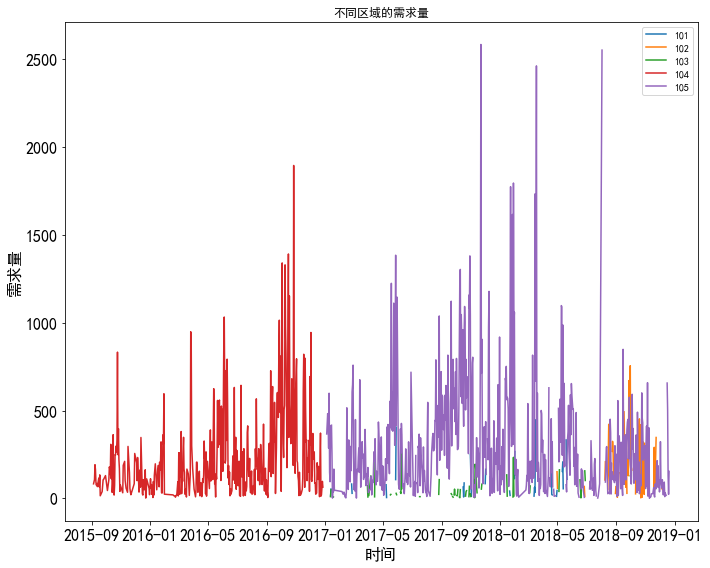

In [23]:
# data=df_fina['2016-12':'2017-02']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data1['101'],ls='solid', label='101')
ax.plot(data1['102'],ls='solid', label='102')
ax.plot(data1['103'],ls='solid', label='103')
ax.plot(data1['104'],ls='solid', label='104')
ax.plot(data1['105'],ls='solid', label='105')
ax.set_xlabel('时间', fontsize = 16)
ax.set_ylabel('需求量', fontsize = 16)
plt.title('不同区域的需求量')
plt.tick_params(labelsize=16)
plt.legend()
plt.tight_layout() 
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\区域对item.png')
plt.show()

## 4.1多个变量预测单期单变量

In [8]:
df_all.head()

,year,month,isyear,issale,Season1,Season2,Season3,Season4,101,102,103,104,105,item_price
0,2015,9,0,0,0,0,1,0,0.0,0.0,0.0,1578.0,0.0,739.565217
1,2015,10,0,0,0,0,1,0,0.0,0.0,0.0,5300.0,0.0,739.208333
2,2015,11,0,1,0,0,1,0,0.0,0.0,0.0,1522.0,0.0,738.705882
3,2015,12,0,0,0,0,0,1,0.0,0.0,0.0,2041.0,0.0,796.687500
4,2016,1,1,0,0,0,0,1,0.0,0.0,0.0,3857.0,0.0,830.446809


In [6]:
dataset = df_all.iloc[:, 1:].values
data_mean = dataset.mean(axis=0)
data_std = dataset.std(axis=0)

dataset = (dataset-data_mean)/data_std
print(dataset.shape)

(43, 13)


In [7]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step) # step表示间隔采样步长，6表示每个小时只使用一个采样值（原数据集每10分钟采集一次）
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [8]:
past_history = 3
future_target = 1
STEP = 1
X, Y= multivariate_data(dataset, dataset[:, -6],
                                               0, None, past_history,
                                               future_target, STEP,
                                               single_step=True)
x_train_single=X[0:34]
y_train_single=Y[0:34]
x_val_single=X[34:36]
# y_val_single=np.array([Y[35]])   .reshape(1,3,13)
y_val_single=Y[34:36]
x_test_single=X[36:]
y_test_single=Y[36:]

In [17]:
print(x_train_single.shape)
print(x_val_single.shape)
print(x_test_single.shape)
print(y_train_single.shape)
print(y_val_single.shape)
print(y_test_single.shape)

(34, 3, 13)
(2, 3, 13)
(3, 3, 13)
(34,)
(2,)
(3,)


In [9]:
# TRAIN_SPLIT1=33
# TRAIN_SPLIT1=37
# dataset = df_all.iloc[:, 1:].values
# data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
# data_std = dataset[:TRAIN_SPLIT].std(axis=0)

# dataset = (dataset-data_mean)/data_std
# print(dataset.shape)

(39, 13)


In [18]:
np.random.seed(7)
np.random.shuffle(x_train_single)
np.random.seed(7)
np.random.shuffle(y_train_single)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model2 = Sequential([
    LSTM(80, return_sequences=True, input_shape=x_train_single.shape[-2:]),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dense(1)
])
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# history = model2.fit(x_train, y_train, batch_size=8, epochs=50), validation_data=(x_val_single, y_val_single), validation_freq=1
history = model2.fit(x_train_single, y_train_single, batch_size=8, epochs=100, validation_data=(x_val_single, y_val_single), validation_freq=1)

Epoch 1/100
5/5 [==============================] - 7s 295ms/step - loss: 1.1783 - val_loss: 0.3177
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 1.1128 - val_loss: 0.3566
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 1.0294 - val_loss: 0.4547
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8936 - val_loss: 0.5915
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.7117 - val_loss: 0.8134
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5362 - val_loss: 1.0627
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5055 - val_loss: 1.1283
Epoch 8/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5107 - val_loss: 1.1356
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.4628 - val_loss: 1.0691
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 0.3820 - val_loss: 1.1580
Epoch 11/100
5/5 [

In [20]:
# test_data = []
# test_labels = []
# test_data1=dataset[[-3,-2,-1]].reshape(1,3,13)
pre_1=model2.predict(x_test_single[0].reshape(1,3,13))
x_test_single[1,2,-6]=pre_1
pre_2=model2.predict(x_test_single[1].reshape(1,3,13))
x_test_single[2,1,-6]=pre_1
x_test_single[2,2,-6]=pre_2
pre_3=model2.predict(x_test_single[2].reshape(1,3,13))

In [21]:
pre_1=pre_1*data_std[-6]+data_mean[-6]
pre_2=pre_2*data_std[-6]+data_mean[-6]
pre_3=pre_3*data_std[-6]+data_mean[-6]

In [22]:
df_pre = pd.DataFrame(index=[0], columns=['1月','2月','3月'])
df_pre.iloc[0,0]=pre_1.item()
df_pre.iloc[0,1]=pre_2.item()
df_pre.iloc[0,2]=pre_3.item()
df_pre[df_pre < 0] = 0
df_pre

,1月,2月,3月
0,636.242371,525.789062,690.059021


In [16]:
# model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 80)             30080     
                                                                 
 dropout (Dropout)           (None, 3, 80)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 100)            72400     
                                                                 
 dropout_1 (Dropout)         (None, 3, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 182,981
Trainable params: 182,981
Non-trai

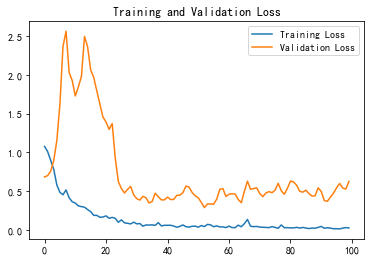

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\多变量损失11.png')
plt.show()

In [19]:
from sklearn.metrics import r2_score
# train集输入模型进行预测
predicted_train_order = model2.predict(x_train_single)
# 对预测数据还原---从（0，1）反归一化到原始范围v
# predicted_train_order = sc.inverse_transform(predicted_train_order)
predicted_train_order = predicted_train_order*data_std[1]+data_mean[1]
# 对真实数据还原---从（0，1）反归一化到原始范围
real_train_order = y_train_single*data_std[1]+data_mean[1]
#test集
predicted_test_order = model2.predict(x_val_single)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_test_order = predicted_test_order*data_std[1]+data_mean[1]
# 对真实数据还原---从（0，1）反归一化到原始范围
real_test_order = y_val_single*data_std[1]+data_mean[1]

print(r2_score(real_train_order,predicted_train_order))

0.9842113180609562


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_train_order,real_train_order)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_train_order,real_train_order))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_train_order,real_train_order)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

均方误差: 2847.858173
均方根误差: 53.365327
平均绝对误差: 42.790361


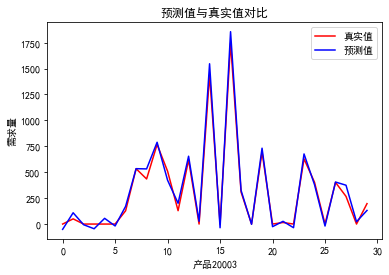

In [43]:
# 画出真实数据和预测数据的对比曲线
plt.plot(real_train_order, color='red', label='真实值')
plt.plot(predicted_train_order, color='blue', label='预测值')
# plt.plot(real_test_order, color='red', label='训练集真实值')
# plt.plot(predicted_train_order, color='blue', label='训练集预测值')
plt.title('预测值与真实值对比')
plt.xlabel('产品20003')
plt.ylabel('需求量')
plt.legend()
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\真实值和预测值11.png')
plt.show()

## 4.2 单变量序列（效果一般）（x1→x1）

In [5]:
# data2=df3[['101','102','103','104','105']]
data2=data1['101'].values
train=data2[0:-5]
test=data2[-5:]
# train=data2.iloc[0:-4,:]
# test=data2.iloc[-4:,:]

In [ ]:
col=[col for col in df.columns if col not in ['order_date','sales_region_code','ord_qty']]
data1=df[col]

In [7]:
from sklearn.preprocessing import MinMaxScaler
# 归一化
sc = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled = sc.fit_transform(train.reshape(-1, 1))  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set = sc.transform(test.reshape(-1, 1))  # 利用训练集的属性对测试集进行归一化

In [8]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [9]:
train = series_to_supervised(training_set_scaled,12,1)
test = series_to_supervised(test_set,3,1)
test

,var1(t-3),var1(t-2),var1(t-1),var1(t)
3,0.093822,0.053204,0.378146,0.000000
4,0.053204,0.378146,0.000000,0.072941


In [10]:
x_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
x_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

In [11]:
x_train = x_train.reshape(x_train.shape[0], 12, 1)
x_test = x_test.reshape(x_test.shape[0], 3, 1)

In [12]:
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)

In [13]:
x_train.shape

(23, 12, 1)

In [13]:
# x_train = np.reshape(x_train, (x_train.shape[0], 3, 5))
# x_test = np.reshape(x_test, (x_test.shape[0], 3, 5))
# x_train.shape

(33, 3, 5)

In [18]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])))
# model.add(LSTM(64,return_sequences=True))
# model.add(LSTM(32,return_sequences=True))
# model.add(Dropout(0.1))
# model.add(Dense(25))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# # model.fit(x_train, y_train, batch_size=1, epochs=50)
# history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/100
4/4 [==============================] - 7s 477ms/step - loss: 0.0799 - val_loss: 0.0018
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0661 - val_loss: 0.0083
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0585 - val_loss: 0.0168
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0581 - val_loss: 0.0226
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0593 - val_loss: 0.0228
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0586 - val_loss: 0.0207
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0582 - val_loss: 0.0194
Epoch 8/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0576 - val_loss: 0.0176
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0579 - val_loss: 0.0172
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0574 - val_loss: 0.0152
Epoch 11/100
4/4 [

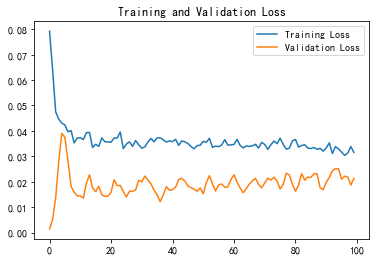

In [25]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

In [31]:
# model = Sequential([
#     LSTM(80, return_sequences=True),
#     Dropout(0.2),
#     LSTM(100),
#     Dropout(0.2),
#     Dense(1)
# ])

In [17]:
x_train.shape

(23, 12, 1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model2 = Sequential([
    LSTM(80, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dense(1)
])
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model2.fit(x_train, y_train, batch_size=8, epochs=50)
# history = model2.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/50
3/3 [==============================] - 8s 19ms/step - loss: 0.1083
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 0.0885
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0799
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0774
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0731
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0721
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0714
Epoch 8/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0700
Epoch 9/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0697
Epoch 10/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0697
Epoch 11/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0683
Epoch 12/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0677
Epoch 13/50
3/3 [==============================] - 0s 22ms/st

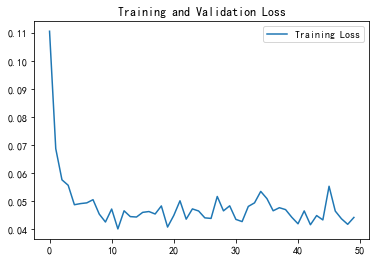

In [21]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\损失.png')
plt.show()

In [25]:
predicted_train_order.shape

(23, 12, 1)

In [24]:
from sklearn.metrics import r2_score
# train集输入模型进行预测
predicted_train_order = model2.predict(x_train)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_train_order = sc.inverse_transform(predicted_train_order)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_train_order = sc.inverse_transform(y_train.reshape(-1, 1))
#test集
predicted_test_order = model2.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_test_order = sc.inverse_transform(predicted_test_order)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_test_order = sc.inverse_transform(y_test.reshape(-1, 1))

print(r2_score(real_train_order,predicted_train_order))

ValueError: Found array with dim 3. Estimator expected <= 2.

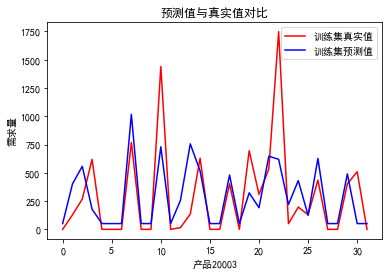

In [40]:
# 画出真实数据和预测数据的对比曲线
plt.plot(real_stock_price, color='red', label='训练集真实值')
plt.plot(predicted_stock_price, color='blue', label='训练集预测值')
plt.title('预测值与真实值对比')
plt.xlabel('产品20003')
plt.ylabel('需求量')
plt.legend()
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\真实值和预测值.png')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_price, real_stock_price)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

均方误差: 99777.187934
均方根误差: 315.875273
平均绝对误差: 204.933963


## 多变量预测多期单变量（x1,x2,xn→x1(t+1),x1(t+2),x1(t+3）

In [71]:
# single_step_model = tf.keras.models.Sequential()
# single_step_model.add(tf.keras.layers.LSTM(32,
#                                            input_shape=x_train_single.shape[-2:],return_sequences=True))
# #x_train_single.shape[-2:]，【120，3】120个时刻，3个特征
# # single_step_model.add(tf.keras.layers.LSTM(32,
# #                                             input_shape=[120,3]))
# # single_step_model.add(tf.keras.layers.LSTM(32,return_sequences=True))
# single_step_model.add(tf.keras.layers.Dense(72))

# single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [48]:
TRAIN_SPLIT=32
past_history = 3
future_target = 3
STEP = 1
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP)

In [49]:
print(x_train_multi.shape)
print(y_train_multi.shape)
print(x_val_multi.shape)
print(y_val_multi.shape)

(29, 3, 13)
(29, 3)
(1, 3, 13)
(1, 3)


In [50]:
np.random.seed(7)
np.random.shuffle(x_train_multi)
np.random.seed(7)
np.random.shuffle(y_train_multi)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model3 = Sequential([
    LSTM(64, return_sequences=True, input_shape=x_train_single.shape[-2:]),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dense(3)
])
# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error')


In [57]:
history1 = model3.fit(x_train_multi, y_train_multi, batch_size=8, epochs=100, validation_data=(x_val_multi, y_val_multi), validation_freq=1)

Epoch 1/100
4/4 [==============================] - 9s 551ms/step - loss: 0.9971 - val_loss: 0.3862
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.9457 - val_loss: 0.3784
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8909 - val_loss: 0.3882
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.7762 - val_loss: 0.4799
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6384 - val_loss: 0.9967
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.5168 - val_loss: 2.1511
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5049 - val_loss: 2.4435
Epoch 8/100
4/4 [==============================] - 0s 19ms/step - loss: 0.4998 - val_loss: 1.7533
Epoch 9/100
4/4 [==============================] - 0s 30ms/step - loss: 0.4539 - val_loss: 1.3722
Epoch 10/100
4/4 [==============================] - 0s 26ms/step - loss: 0.4426 - val_loss: 1.3015
Epoch 11/100
4/4 [

In [58]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 3, 64)             19968     
                                                                 
 dropout_6 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_10 (LSTM)              (None, 3, 128)            98816     
                                                                 
 dropout_7 (Dropout)         (None, 3, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 250,755
Trainable params: 250,755
Non-tr

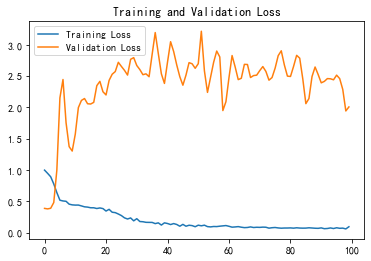

In [59]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig(r'E:\2023泰迪杯\B题-全部数据\绘图\多变量损失12.png')
plt.show()

In [61]:
y=model3.predict(x_train_multi)
y*data_std[1]+data_mean[1]

array([[-1.7022247e+01, -4.0672760e+01,  8.8534546e-01],
       [ 2.6107596e+02,  2.1013258e+02,  9.3770386e+01],
       [ 1.4629929e+01,  1.5126495e+01,  6.6706848e+00],
       [-1.8414612e+00, -3.5585266e+01,  2.7416336e+01],
       [ 3.8801270e+00,  8.2113449e+01,  2.2885776e+02],
       [ 9.3561478e+01,  1.1066910e+01, -2.4076141e+01],
       [ 1.2836595e+02,  1.7771013e+02,  2.5454926e+02],
       [ 5.6338391e+02,  5.6159442e+02,  4.6062329e+02],
       [ 5.4356152e+02,  5.3722290e+02,  2.2484669e+02],
       [ 4.4555780e+02,  1.3943601e+03,  6.7543713e+02],
       [ 2.2553946e+02,  3.4663376e+02,  1.2224744e+02],
       [ 2.4716313e+02,  3.1419403e+02,  1.0947597e+02],
       [ 3.1064487e+02,  5.8678180e+02,  1.3572472e+02],
       [ 9.6268311e+00,  1.6465988e+01, -9.6664429e+00],
       [ 1.7722771e+03,  3.3478067e+02,  1.3767878e+03],
       [-1.5888641e+01, -2.5818298e+01,  4.2208069e+01],
       [ 2.9415076e+02,  1.7703203e+03,  4.0691772e+02],
       [ 4.0437375e+02,  3.6646

In [ ]:
from sklearn.metrics import r2_score
# train集输入模型进行预测
predicted_train_order = model3.predict(x_train_single)
# 对预测数据还原---从（0，1）反归一化到原始范围v
# predicted_train_order = sc.inverse_transform(predicted_train_order)
predicted_train_order = predicted_train_order*data_std[1]+data_mean[1]
# 对真实数据还原---从（0，1）反归一化到原始范围
real_train_order = y_train_single*data_std[1]+data_mean[1]
#test集
predicted_test_order = model3.predict(x_val_single)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_test_order = predicted_test_order*data_std[1]+data_mean[1]
# 对真实数据还原---从（0，1）反归一化到原始范围
real_test_order = y_val_single*data_std[1]+data_mean[1]

print(r2_score(real_train_order,predicted_train_order))

# 5移动平均预测

In [4]:
item_list=df['item_code'].unique().tolist()  #一共有1758个商品
# df_null.to_csv(r'E:\2023泰迪杯\B题-全部数据\空值表.csv')
df_null=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\空值表.csv')
df_null=df_null.set_index(['year','month'])

In [5]:
df_pre = pd.DataFrame()
for i in item_list:
    data=df[df['item_code']==i]
    data=data.groupby(['year','month','sales_region_code'])['ord_qty'].sum()
    data=data.sort_index()
    data=data.unstack()
    #     data.columns=['101','102','103','104','105']
    data.columns=[str(i) for i in data.columns.values.tolist()]
    data=df_null+data
    data=data.reset_index(drop=True)
    data=data.fillna(value=0)
    data.iloc[-1,:]=data.iloc[-1,:]*1.5
    df2=data.tail().mean()
    df_pre = df_pre.append(df2,ignore_index=True)
df_pre.index=item_list
df_pre.to_csv(r'E:\2023泰迪杯\B题-全部数据\移动平均预测.csv')

In [16]:
#销量为0的商品，一共有682个商品
df_pre['和']=df_pre.sum(axis=1)
df_pre1=df_pre[df_pre['和']==0]
df_pre1.to_csv(r'E:\2023泰迪杯\B题-全部数据\销量为零的商品.csv')

In [20]:
# item_list0=df_pre1.index.tolist()

In [25]:
df_pre2=df_pre[~(df_pre['和']==0)]
df_pre2.to_csv(r'E:\2023泰迪杯\B题-全部数据\销量不为零的商品.csv')

In [3]:
df_pre2=pd.read_csv(r'E:\2023泰迪杯\B题-全部数据\销量不为零的商品.csv',index_col=0)
# df=df.drop(df.columns[0], axis=1)
df_pre2.head()

,101,102,103,104,105,和
21183,2.2,1.8,2.0,0.0,1598.4,1604.4
20323,1946.4,1567.1,812.4,0.0,64.9,4390.8
21350,0.8,6.2,3.2,0.0,0.0,10.2
20657,29.9,43.8,26.3,0.0,13.2,113.2
20457,2167.8,2269.0,1279.8,0.0,67.5,5784.1


In [5]:
item_list1=df_pre2.index.tolist()
data=df.loc[df['item_code'].isin(item_list1)]
#筛选出列值属于某个范围内的行，用isin：
#df.loc[df['column_name'].isin(some_values)] # some_values是可迭代对象
data.to_csv(r'E:\2023泰迪杯\B题-全部数据\需要预测的1076商品.csv',index=False)

# 6第二问建模探索

In [7]:
df.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,Holiday,month,sale,sales_1,sales_2,monperiod_1,monperiod_2,monperiod_3,Season_1,Season_2,Season_3,Season_4
0,2015-09-01,104,22069,307,403,1114.0,19,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015-09-01,104,20028,301,405,1012.0,12,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-09-02,104,21183,307,403,428.0,109,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015-09-02,104,20448,308,404,962.0,3,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2015-09-02,104,21565,307,403,1400.0,3,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data1=df.groupby(['order_date','sales_region_code','item_code'])['item_price'].sum()

In [10]:
data1=data1.reset_index()

,order_date,sales_region_code,item_code,item_price
0,2015-09-01,104,20028,1012.0
1,2015-09-01,104,22069,1114.0
2,2015-09-02,101,20657,2996.0
3,2015-09-02,102,20323,99.0
4,2015-09-02,102,20457,164.0
...,...,...,...,...
383214,2018-12-20,105,22006,1511.0
383215,2018-12-20,105,22028,246.0
383216,2018-12-20,105,22058,4064.0
383217,2018-12-20,105,22072,427.0


In [20]:
df1 = pd.DataFrame({  
    "grade":[20,19,28,27,24],
    "age":[20,19,28,27,24],
    "class":[1,2,2,1,2]
})

df1

,grade,age,class
0,20,20,1
1,19,19,2
2,28,28,2
3,27,27,1
4,24,24,2


In [23]:
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]

values = raw.values
data = series_to_supervised(values)
print(data)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        0.0       50.0        1       51
2        1.0       51.0        2       52
3        2.0       52.0        3       53
4        3.0       53.0        4       54
5        4.0       54.0        5       55
6        5.0       55.0        6       56
7        6.0       56.0        7       57
8        7.0       57.0        8       58
9        8.0       58.0        9       59


In [24]:
raw

,ob1,ob2
0,0,50
1,1,51
2,2,52
3,3,53
4,4,54
5,5,55
6,6,56
7,7,57
8,8,58
9,9,59


In [7]:
df.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,Holiday,month,sale,sales_1,sales_2,monperiod_1,monperiod_2,monperiod_3,Season_1,Season_2,Season_3,Season_4
0,2015-09-01,104,22069,307,403,1114.0,19,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015-09-01,104,20028,301,405,1012.0,12,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-09-02,104,21183,307,403,428.0,109,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015-09-02,104,20448,308,404,962.0,3,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2015-09-02,104,21565,307,403,1400.0,3,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
"""
合并数据
"""
list_join_func = lambda x: " ".join([str(i) for i in x])


agg_dict = {'sales_region_code' : list_join_func,
            'item_code' : list_join_func,
            'first_cate_code' : list_join_func,
            'second_cate_code' : list_join_func}

rename_dict = {
            'sales_region_code' : 'sales_path',
            'item_code' : 'item_path',
            'first_cate_code' : 'first_cate_path',
            'second_cate_code' : 'second_cate_path'}

In [14]:
data=df[df['sales_region_code']==104]
df_a = data.groupby('order_date').agg(agg_dict).reset_index().rename(columns=rename_dict)
df_a

,order_date,sales_path,item_path,first_cate_path,second_cate_path
0,2015-09-01,104 104,22069 20028,307 301,403 405
1,2015-09-02,104 104 104 104 104 104,21183 20448 21565 20606 20606 20028,307 308 307 308 308 301,403 404 403 404 404 405
2,2015-09-05,104 104 104 104 104 104 104 104 104 104 104 10...,21246 21315 21277 20877 21061 20085 20003 2198...,307 307 308 308 308 301 301 301 307 307 307 30...,403 403 404 404 404 405 405 405 403 403 403 40...
3,2015-09-06,104 104 104 104 104 104 104 104 104 104 104 104,20944 20944 21550 21541 21061 20877 21277 2006...,301 301 301 301 308 308 308 307 307 307 308 307,405 405 405 405 404 404 404 403 403 403 404 403
4,2015-09-07,104 104 104 104 104 104 104 104 104 104 104 10...,20414 20050 20606 20448 21664 20898 21929 2124...,308 308 308 308 307 307 308 307 308 307 307 30...,404 404 404 404 403 403 404 403 404 403 403 40...
...,...,...,...,...,...
459,2016-12-27,104 104 104 104 104 104 104 104 104 104 104 10...,21566 21566 20437 21716 21716 20006 20006 2086...,307 307 307 307 307 307 307 307 307 307 307 30...,403 403 403 403 403 403 403 403 403 403 403 40...
460,2016-12-28,104 104 104 104 104 104 104 104 104 104 104 10...,21566 21716 20006 21183 20150 21828 20803 2104...,307 307 307 307 304 304 304 304 304 304 304 30...,403 403 403 403 409 409 409 409 409 409 409 40...
461,2016-12-29,104 104 104 104 104 104 104 104 104 104 104 10...,21049 20803 21828 20935 20150 22040 20986 2066...,304 304 304 304 304 304 304 304 304 307 307 30...,409 409 409 409 409 409 409 409 409 403 403 40...
462,2016-12-30,104 104 104 104 104 104 104 104 104 104 104 10...,20512 21124 21081 21636 22021 21716 20862 2000...,308 307 307 307 307 307 307 307 307 307 308 30...,404 403 403 403 403 403 403 403 403 403 404 40...


In [15]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,Holiday,month,sale,sales_1,sales_2,monperiod_1,monperiod_2,monperiod_3,Season_1,Season_2,Season_3,Season_4
0,2015-09-01,104,22069,307,403,1114.0,19,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015-09-01,104,20028,301,405,1012.0,12,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-09-02,104,21183,307,403,428.0,109,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015-09-02,104,20448,308,404,962.0,3,False,9,False,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2015-09-02,104,21565,307,403,1400.0,3,False,9,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178615,2016-12-31,104,21551,308,404,1427.0,8,False,12,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
178616,2016-12-31,104,21179,308,404,1226.0,7,False,12,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
178617,2016-12-31,104,20340,308,404,1227.0,5,False,12,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
178618,2016-12-31,104,21446,308,404,1531.0,67,False,12,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:

X=data[col].values
Y=data['ord_qty'].values

NameError: name 'data' is not defined

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

reg = reg.fit(X_train, y_train)
reg.score(X_test, y_test) 

(20050, 16) (20050,)
(5013, 16) (5013,)


0.24417203175812996

In [21]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

# from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

In [22]:
clf = LinearRegression()
clf.fit(X_train, y_train)
score = mean_squared_error(y_test, clf.predict(X_test))
print("LinearRegression:   ", score)

LinearRegression:    45787.48471057872


In [23]:
clf.score(X_test, y_test)

0.025428794988801906

In [25]:
clf = KNeighborsRegressor(n_neighbors=8)
clf.fit(X_train, y_train)

score = mean_squared_error(y_test, clf.predict(X_test))
print("DecisionTreeRegressor:   ", score)
print(clf.score(X_test, y_test))

DecisionTreeRegressor:    41144.72346898065
0.1242484057711809


In [26]:
# lgb回归模型
clf = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )

# 训练模型
clf.fit(X=X_train, y=y_train)
print(clf.score(X_test, y_test))

0.3679815780350779


In [27]:
from xgboost import XGBRegressor as XGBR
reg = XGBR(n_estimators=100).fit(X_train, y_train)
# reg.predict(X_train, y_train) #传统接口predict
print(reg.score(X_test, y_test))


0.22979671072144459


In [ ]:
import torch.nn.functional as F


class BPNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()  #继承类
#         self.conv1 = nn.Conv2d(3, 16, 5) #输入通道，输出通道，卷积核大小
#         self.pool1 = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(16, 32, 5)
#         self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(19, 520)
        self.fc2 = nn.Linear(520, 1000)
        self.fc3 = nn.Linear(1000, 1758)

    def forward(self, x):
        x = F.relu(self.conv1(x))    # input(3, 32, 32) output(16, 28, 28)
        x = self.pool1(x)            # output(16, 14, 14)
        x = F.relu(self.conv2(x))    # output(32, 10, 10)
        x = self.pool2(x)            # output(32, 5, 5)
        x = x.view(-1, 32*5*5)       # output(32*5*5)#将数据拉成一维
        x = F.relu(self.fc1(x))      # output(120)
        x = F.relu(self.fc2(x))      # output(84)
        x = self.fc3(x)              # output(10)，不用加softmax函数。在计算损失函数nn.CrossEntropyLoss()时，包含softmax
        return x

In [30]:
X_train

array([[21470, 307, 403, ..., 1.0, 0.0, 0.0],
       [20085, 301, 405, ..., 0.0, 1.0, 0.0],
       [20911, 301, 405, ..., 1.0, 0.0, 0.0],
       ...,
       [20085, 301, 405, ..., 0.0, 0.0, 0.0],
       [21872, 308, 404, ..., 0.0, 0.0, 0.0],
       [20065, 308, 404, ..., 0.0, 1.0, 0.0]], dtype=object)

In [9]:
del df['Holiday']
del df['sale']

In [10]:
col=[col for col in df.columns if col not in ['order_date','sales_region_code','ord_qty']]
data1=df[col]
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data1)

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
